

Introducción al Análisis Exploratorio de Datos (EDA)
En los últimos años, Argentina ha experimentado un notable crecimiento en la conectividad a internet, impulsado por iniciativas gubernamentales y la colaboración con el sector privado. La pandemia de COVID-19 ha acelerado aún más esta tendencia, destacando la importancia crítica de una infraestructura de internet robusta y confiable. La expansión de la Red Federal de Fibra Óptica (REFEFO) ha sido un pilar fundamental en este avance, permitiendo que comunidades rurales y menos desarrolladas accedan a internet de alta velocidad, lo que a su vez impulsa el desarrollo económico y mejora la calidad de vida de sus habitantes.

En este análisis exploratorio de datos (EDA), examinaremos un conjunto de datos detallados que abordan diversos aspectos de la conectividad a internet en Argentina. El dataset incluye información sobre el acceso a internet y además se incorporan datos económicos que permiten evaluar el impacto financiero del crecimiento de la conectividad en el país.

El objetivo de este EDA es comprender mejor los patrones y tendencias en el uso de internet, identificar posibles correlaciones entre variables, y descubrir insights valiosos que puedan guiar futuras inversiones y políticas en el ámbito de la conectividad digital. A través de una serie de análisis univariados, bivariados y multivariados, exploraremos la estructura y características del dataset, destacando los aspectos más relevantes y proporcionando una base sólida para análisis posteriores y la toma de decisiones informadas.

los datasets que utilizaremos serán
- df_definitivol: Conjunto de datos que tiene cantidad de accesos por tecnologia y velocidad por provincia, penetracion cada 100 hogares,penetracion cada 100 habitantes'
- df_ingresos_dolar: tiene los ingresos por trimestre en pesos,adicionalmente agregó el valor de dolar blue(dolar libre en argentina, no es el dolar oficial pero es el valor de referencia que rige en los mercados) para poder tener una idea de como fueron los ingresos en dolares
- df_localidades_tecnologia: es un recuento de las tegnologias en cada localidad
- Totales_VMD: es un promedio de la velocidad media de bajada por trimestre

In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [264]:
df_def = pd.read_csv('../data/df_definitivo.csv')
df_ingresos = pd.read_csv('../data/df_ingresos_dolar.csv')
df_tecnoXloc= pd.read_csv('../data/df_localidades_tecnologia.csv')
df_vmd = pd.read_csv('../data/Totales_VMD.csv')


### Primer análisis
-Caída del Uso de ADSL:

Se observa una notable caída en el uso de la tecnología ADSL, que va quedando en desuso.
Esta disminución es evidente en los últimos años y refleja la transición hacia tecnologías más avanzadas.

-Despegue del Cablemodem:

Notamos un notable crecimiento del uso del Cablemodem, que en el tercer trimestre de 2017 superó al ADSL y se convirtió en la tecnología con más accesos en Argentina.
Cablemodem ha sido la tecnología más utilizada hasta la fecha, alcanzando su pico más alto en el primer trimestre de 2022.
Sin embargo, desde el segundo trimestre de 2022, observamos un estancamiento en su crecimiento.
Crecimiento de la Fibra Óptica:

La Fibra Óptica muestra un crecimiento constante desde el tercer trimestre de 2018.
Este crecimiento se acelera notablemente post-pandemia, coincidiendo con la inversión de empresas como Movistar y Telecentro en la expansión de su red de fibra óptica.
La implementación del Proyecto REFEFO ha sido un factor crucial en este crecimiento, proporcionando una infraestructura robusta que ha facilitado el aumento de accesos.

La tecnología de Fibra Óptica sigue una tendencia creciente y, de mantenerse así, podría superar al Cablemodem como la tecnología más utilizada en el mercado.
El estancamiento del Cablemodem y la caída del ADSL indican una clara preferencia hacia tecnologías más modernas y eficientes como la Fibra Óptica.

Recomendaciones:
Empresas de Telecomunicaciones: Deberían continuar invirtiendo en la expansión y mejora de la infraestructura de Fibra Óptica para satisfacer la creciente demanda.
Políticas Públicas: Apoyar proyectos similares a REFEFO que promuevan la conectividad en áreas rurales y menos desarrolladas.
Usuarios: Considerar la migración a tecnologías más avanzadas como la Fibra Óptica para mejorar la calidad y velocidad de su conexión a internet.


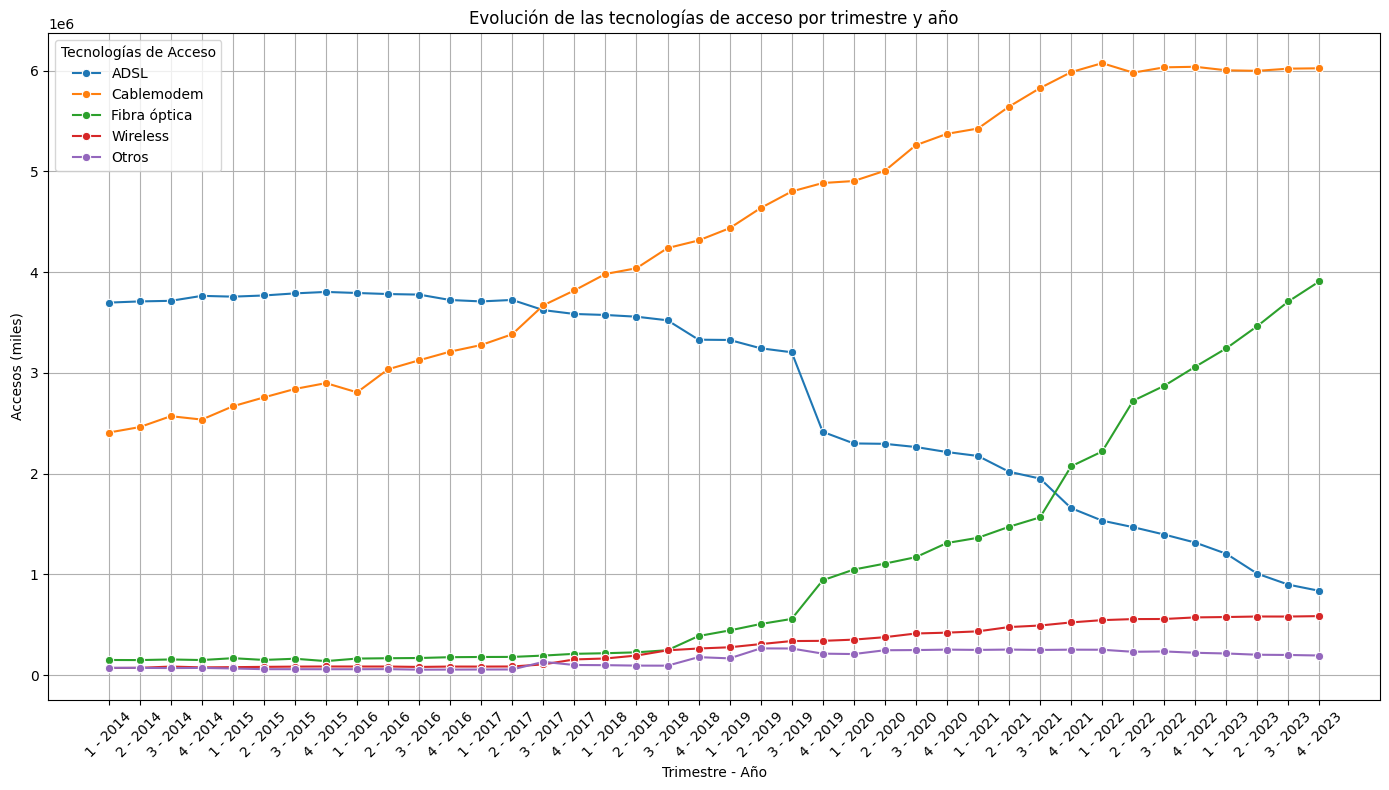

In [265]:

columns_of_interest = ['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

df_grouped = df_def[columns_of_interest].groupby(['Año', 'Trimestre']).sum().reset_index()

df_grouped['Trimestre - Año'] = df_grouped['Trimestre'].astype(str) + ' - ' + df_grouped['Año'].astype(str)

plt.figure(figsize=(14, 8))

for column in columns_of_interest[2:]:
    sns.lineplot(data=df_grouped, x='Trimestre - Año', y=column, marker='o', label=column)

plt.title('Evolución de las tecnologías de acceso por trimestre y año')
plt.xlabel('Trimestre - Año')
plt.ylabel('Accesos (miles)')
plt.legend(title='Tecnologías de Acceso')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar los trimestres para mejor visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()

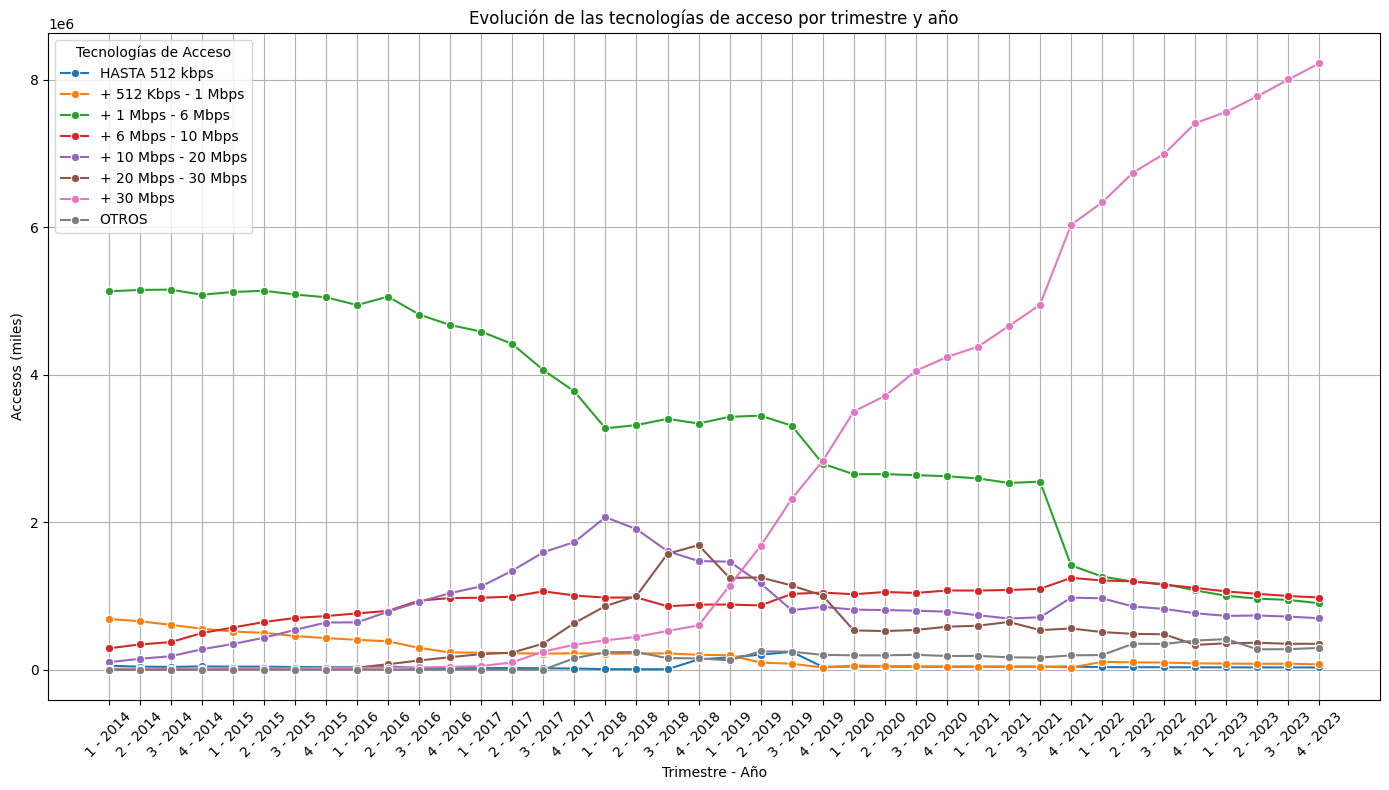

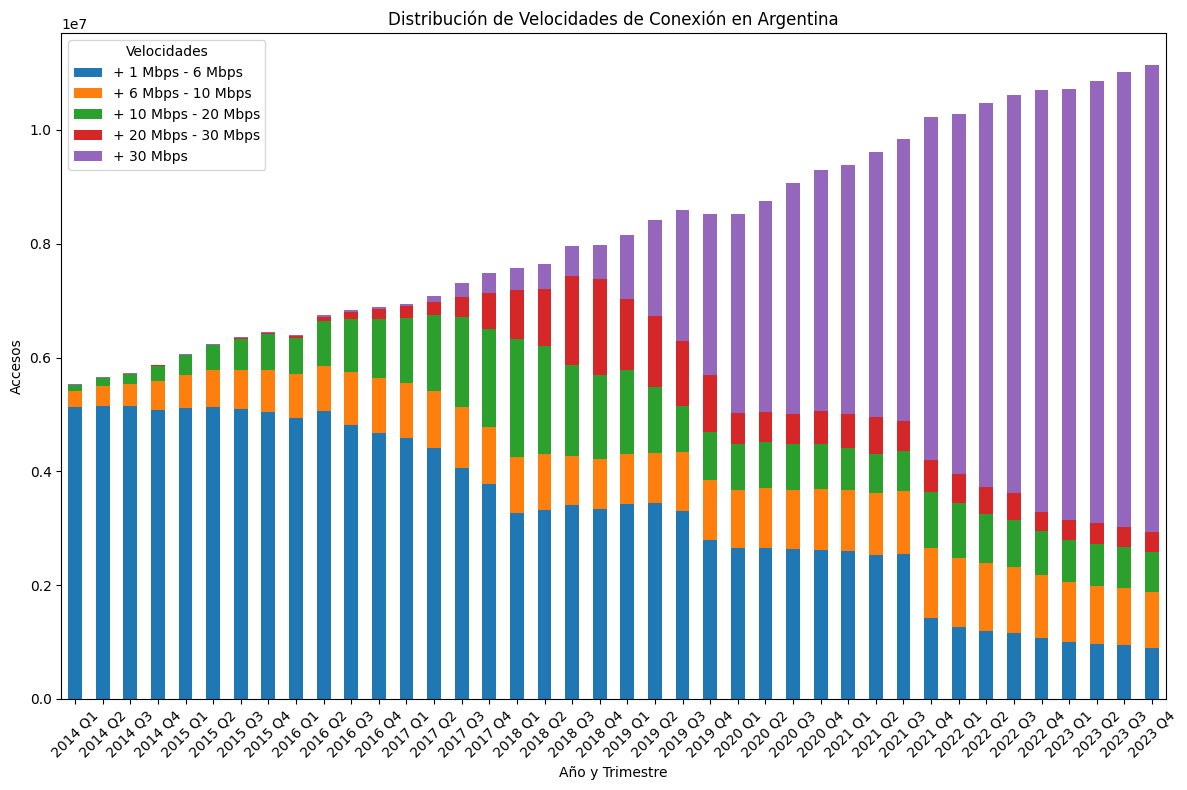

In [266]:

#gráfico de línea de tiempo de las velocidades

columns_of_interest = ['Año', 'Trimestre', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']

df_grouped = df_def[columns_of_interest].groupby(['Año', 'Trimestre']).sum().reset_index()

df_grouped['Trimestre - Año'] = df_grouped['Trimestre'].astype(str) + ' - ' + df_grouped['Año'].astype(str)

plt.figure(figsize=(14, 8))

for column in columns_of_interest[2:]:
    sns.lineplot(data=df_grouped, x='Trimestre - Año', y=column, marker='o', label=column)

plt.title('Evolución de las tecnologías de acceso por trimestre y año')
plt.xlabel('Trimestre - Año')
plt.ylabel('Accesos (miles)')
plt.legend(title='Tecnologías de Acceso')
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()

# Gráfico de barras apiladas de las velocidades

plt.show()

df_velocidades = df_def[['Año', 'Trimestre', 'Provincia', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']]

df_velocidades['Año_Trimestre'] = df_velocidades['Año'].astype(str) + ' Q' + df_velocidades['Trimestre'].astype(str)

df_total = df_velocidades.groupby('Año_Trimestre').sum().reset_index()

df_total.set_index('Año_Trimestre')[['+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']].plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Distribución de Velocidades de Conexión en Argentina')
plt.xlabel('Año y Trimestre')
plt.ylabel('Accesos')
plt.legend(title='Velocidades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Caída en Velocidades de 1-6 Mbps:

- Se observa una notable caída en la cantidad de accesos con velocidades entre 1 y 6 Mbps.
Esta caída podría estár  vinculada con la disminución del uso de ADSL, ya que la banda ancha solía ofrecer planes en este rango de velocidad.

Crecimiento en Velocidades de 6-10 Mbps, 10-20 Mbps, y 20-30 Mbps:

- A partir del año 2017, los planes de 6-10 Mbps, 10-20 Mbps y 20-30 Mbps muestran un crecimiento vinculado al aumento del uso de Cablemodem.
Estas velocidades alcanzaron un máximo de aproximadamente 2 mil accesos.

Crecimiento Notable en Velocidades de +30 Mbps:

- Desde el 2018, se observa un crecimiento significativo en los accesos con velocidades superiores a 30 Mbps.
Este crecimiento está impulsado por la expansión del Cablemodem y la posterior aparición y adopción de la Fibra Óptica.
Actualmente, las velocidades de +30 Mbps son las más comunes en Argentina.

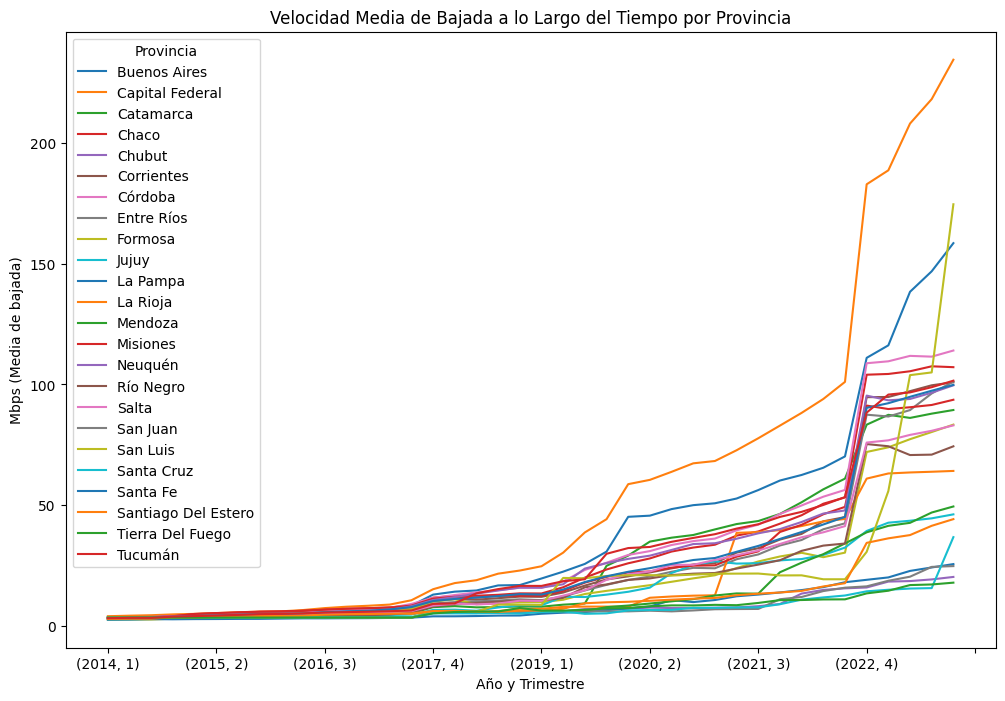

In [267]:
import matplotlib.pyplot as plt

# Agrupa por año, trimestre y provincia para obtener la velocidad media de bajada en cada período
df_time_provincia = df_def.groupby(['Año', 'Trimestre', 'Provincia'])['Mbps (Media de bajada)'].mean().unstack('Provincia')

# Graficar la velocidad media de bajada a lo largo del tiempo para cada provincia
df_time_provincia.plot(figsize=(12, 8), title='Velocidad Media de Bajada a lo Largo del Tiempo por Provincia')
plt.xlabel('Año y Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(title='Provincia')
plt.show()


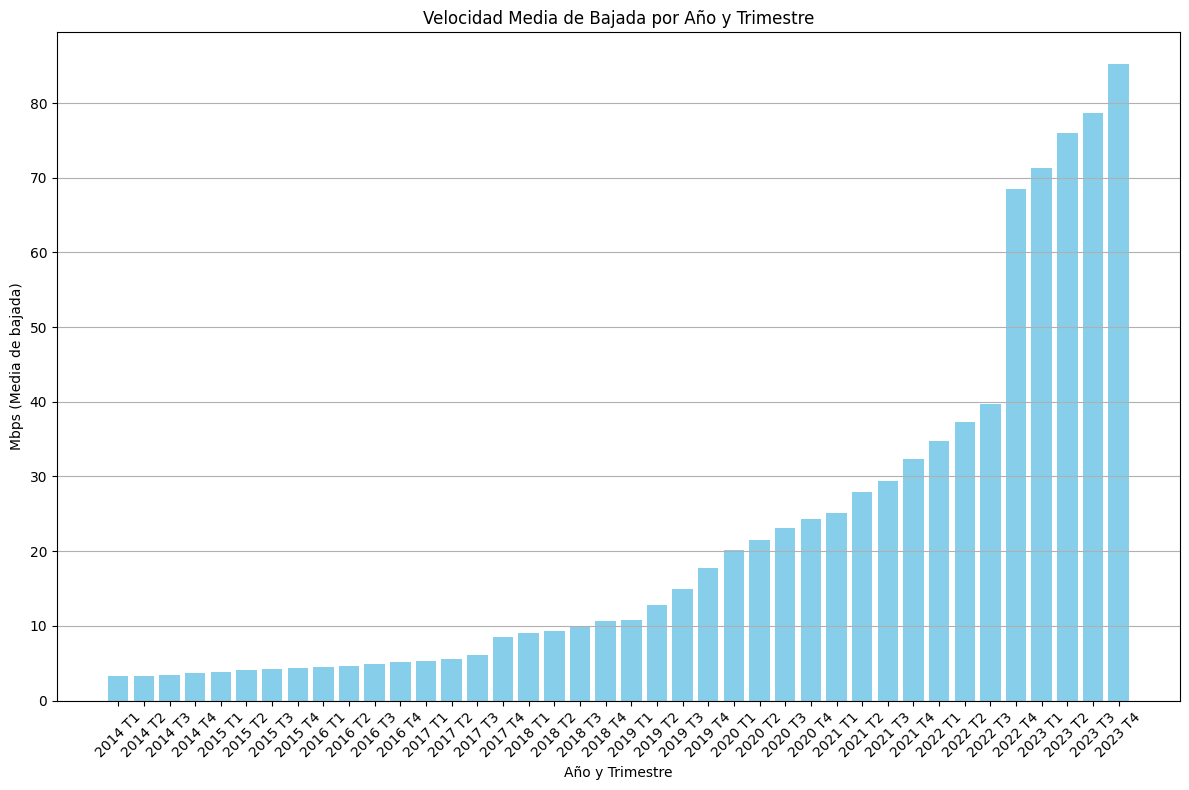

In [268]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame df_def cargado y procesado

# Agrupar por año y trimestre para obtener la velocidad media de bajada en cada período
df_time = df_def.groupby(['Año', 'Trimestre'])['Mbps (Media de bajada)'].mean().reset_index()

# Crear una columna combinada de 'Año' y 'Trimestre' para el eje X
df_time['Periodo'] = df_time['Año'].astype(str) + ' T' + df_time['Trimestre'].astype(str)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(df_time['Periodo'], df_time['Mbps (Media de bajada)'], color='skyblue')
plt.title('Velocidad Media de Bajada por Año y Trimestre')
plt.xlabel('Año y Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


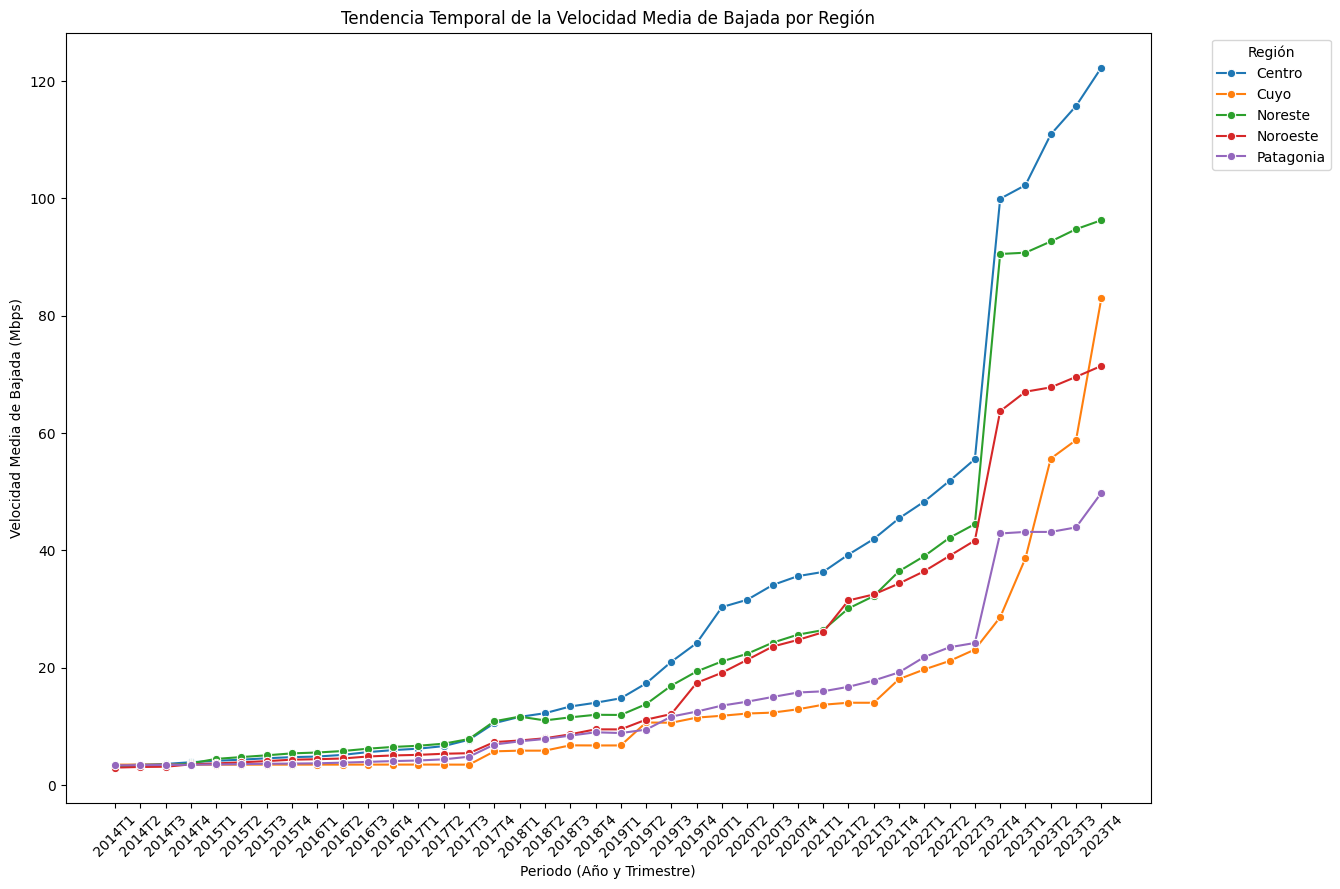

In [269]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que 'Año' y 'Trimestre' sean de tipo string para la concatenación
df_def['Año'] = df_def['Año'].astype(str)
df_def['Trimestre'] = df_def['Trimestre'].astype(str)

# Crear una nueva columna que combine Año y Trimestre
df_def['Periodo'] = df_def['Año'] + 'T' + df_def['Trimestre']

# Agrupar por Región y Periodo para obtener la media de Mbps (Media de bajada)
df_time_region = df_def.groupby(['Región', 'Periodo'])['Mbps (Media de bajada)'].mean().reset_index()

# Ordenar los periodos para la visualización
df_time_region['Periodo'] = pd.Categorical(df_time_region['Periodo'], 
                                           categories=sorted(df_time_region['Periodo'].unique(), 
                                                             key=lambda x: (int(x[:4]), int(x[5]))),
                                           ordered=True)

# Visualizar la tendencia temporal de la velocidad media de bajada por región
plt.figure(figsize=(14, 10))
sns.lineplot(data=df_time_region, x='Periodo', y='Mbps (Media de bajada)', hue='Región', marker='o')
plt.title('Tendencia Temporal de la Velocidad Media de Bajada por Región')
plt.xlabel('Periodo (Año y Trimestre)')
plt.ylabel('Velocidad Media de Bajada (Mbps)')
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

Una velocidad media de bajada cada vez más alta indica el progreso tecnologico y de infrastructura que tiene la Argentina internet.
En cuanto a las provincias Buenos Aires y CABA están un escalón por encima del resto de las provincias, aunque la sorpresa es San Luis que logra ubicarse entre BSAS y CABA, la región puntana desde hace años esta a la vanguardia en temas de conectividad, ya que fue la primera en tener un sistema wireless de internet para su población.

Si observamos el gráfico regional vemos que el centro del pais tiene el mejor promedio y que las demás regiones continuan con un rápido crecimento desde el segundo trimestre del 2022

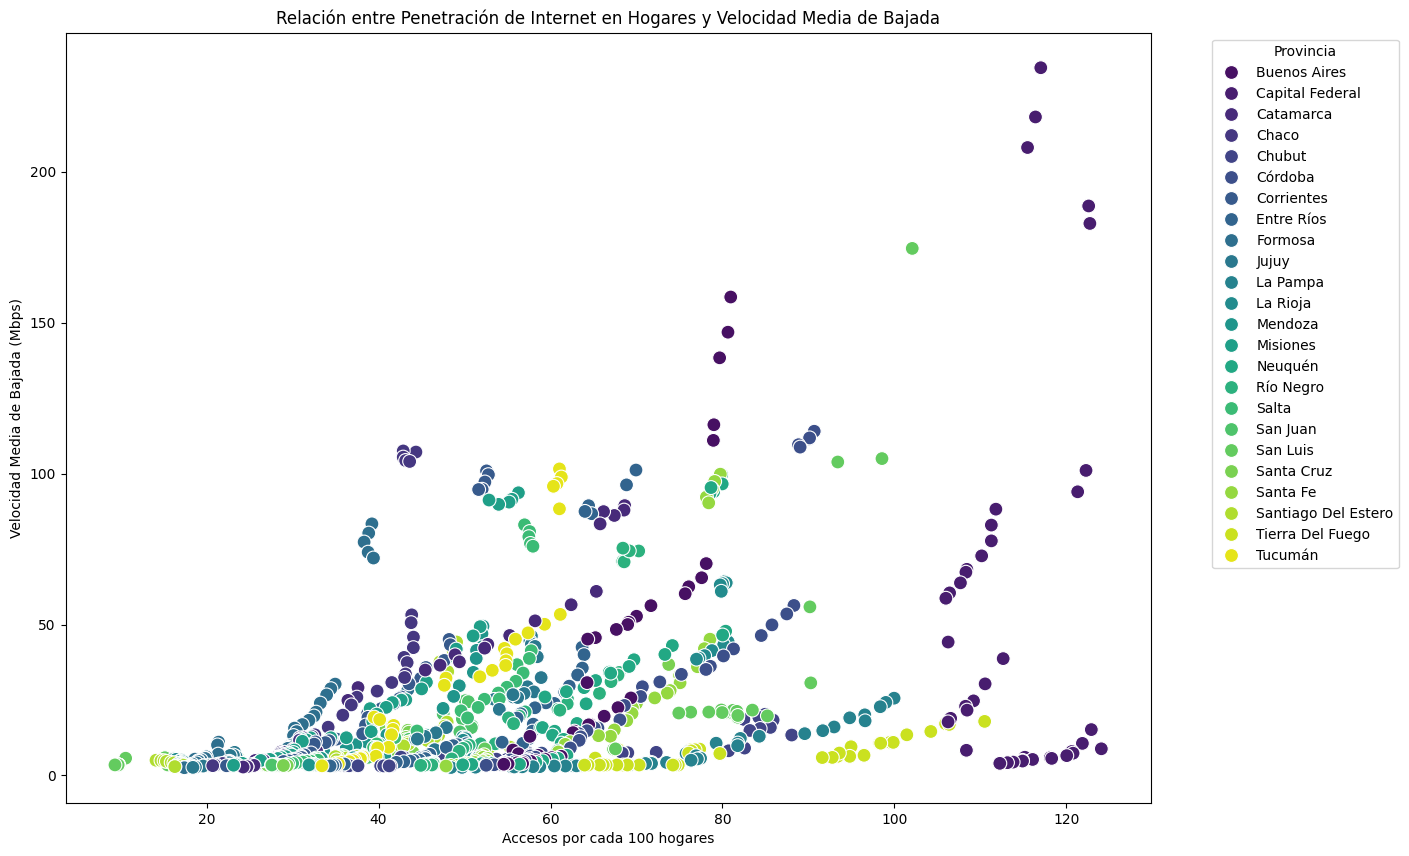

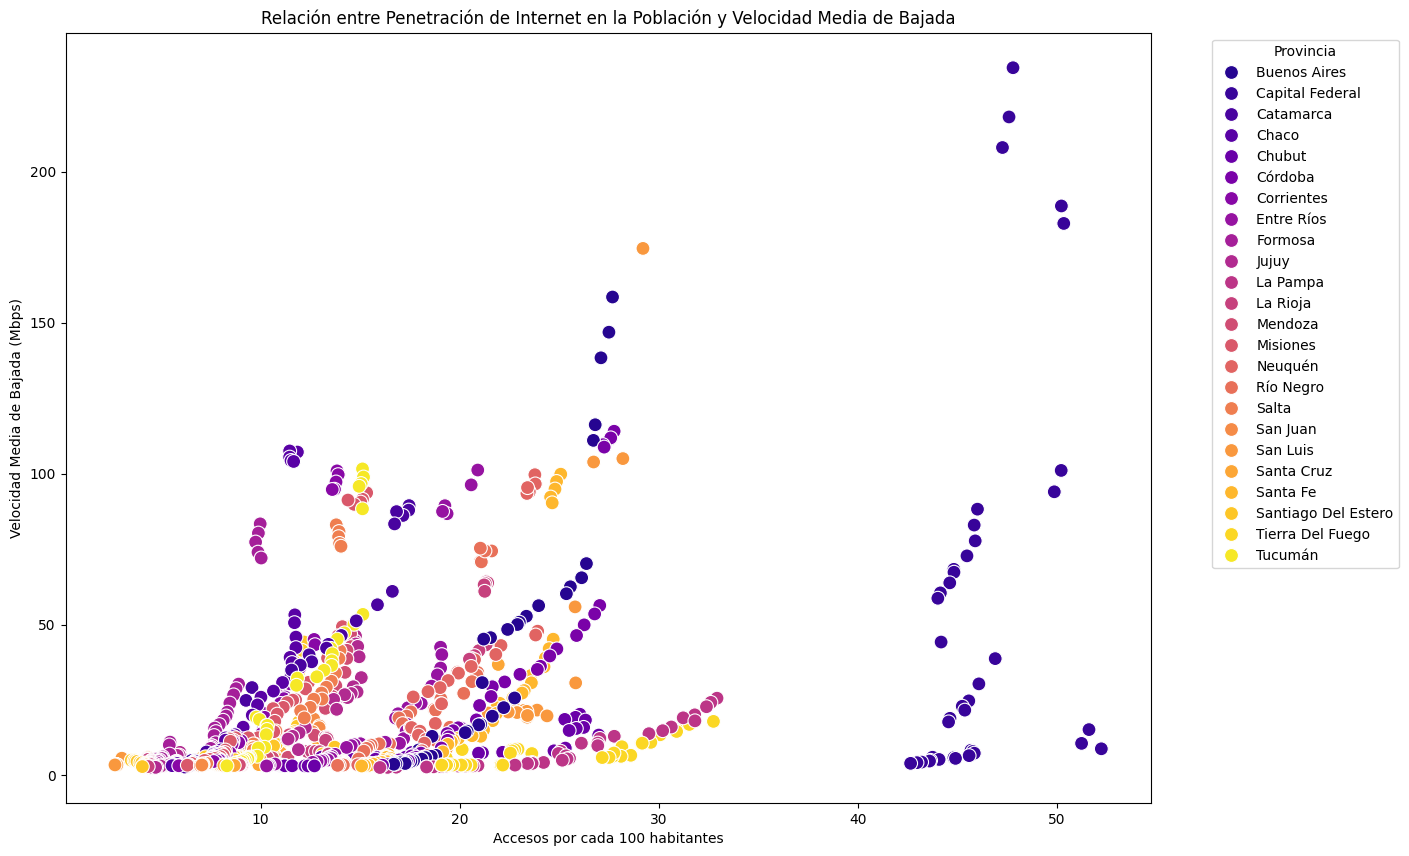

In [270]:
# Relación entre la penetración de internet en hogares y la velocidad media de bajada
plt.figure(figsize=(14, 10))
sns.scatterplot(x='Accesos por cada 100 hogares', y='Mbps (Media de bajada)', data=df_def, hue='Provincia', palette='viridis', s=100)
plt.title('Relación entre Penetración de Internet en Hogares y Velocidad Media de Bajada')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Velocidad Media de Bajada (Mbps)')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Relación entre la penetración de internet en la población y la velocidad media de bajada
plt.figure(figsize=(14, 10))
sns.scatterplot(x='Accesos por cada 100 hab', y='Mbps (Media de bajada)', data=df_def, hue='Provincia', palette='plasma', s=100)
plt.title('Relación entre Penetración de Internet en la Población y Velocidad Media de Bajada')
plt.xlabel('Accesos por cada 100 habitantes')
plt.ylabel('Velocidad Media de Bajada (Mbps)')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


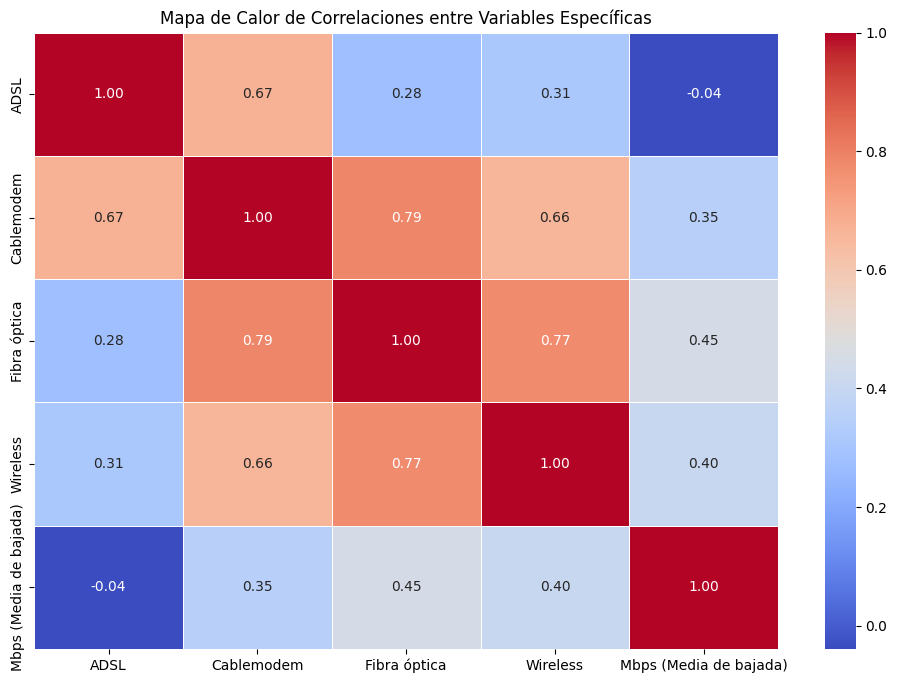

In [271]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las columnas de interés
columns_of_interest = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Mbps (Media de bajada)']#, 'Accesos por cada 100 hogares', 'Accesos por cada 100 hab']

# Asegúrate de que las columnas de interés son numéricas
df_interest = df_def[columns_of_interest].select_dtypes(include=['float64', 'int64'])

# Calcula la matriz de correlación para las columnas seleccionadas
correlation_matrix_specific = df_interest.corr()

# Configura el tamaño de la figura
plt.figure(figsize=(12, 8))

# Genera el mapa de calor
sns.heatmap(correlation_matrix_specific, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Título y etiquetas
plt.title('Mapa de Calor de Correlaciones entre Variables Específicas')
plt.show()


ADSL (-0.30):

Hay una correlación negativa moderada entre las conexiones ADSL y la velocidad media de bajada. Esto sugiere que las áreas con más conexiones ADSL tienden a tener velocidades medias de bajada más bajas. Es posible que ADSL, siendo una tecnología más antigua y limitada en términos de velocidad, no contribuya significativamente a velocidades altas de internet.
Cablemodem (0.35):

Existe una correlación positiva moderada entre las conexiones de cablemodem y la velocidad media de bajada. Esto indica que las áreas donde se utiliza más el cablemodem tienden a tener velocidades medias de bajada más altas. El cablemodem suele ofrecer velocidades más rápidas en comparación con ADSL, lo que puede explicar esta asociación positiva.
Wireless (0.4):

Hay una correlación positiva moderada entre las conexiones inalámbricas y la velocidad media de bajada. Esto sugiere que las tecnologías inalámbricas contribuyen significativamente a las velocidades medias de bajada más altas. Las tecnologías inalámbricas pueden incluir 4G, 5G, y otras conexiones móviles avanzadas que ofrecen velocidades competitivas.
Fibra óptica (0.45):

Existe una correlación positiva fuerte entre las conexiones de fibra óptica y la velocidad media de bajada. Esto indica que las áreas con más infraestructura de fibra óptica tienen velocidades medias de bajada considerablemente más altas. La fibra óptica proporciona velocidades ultra rápidas y es una tecnología moderna que puede manejar grandes volúmenes de datos de manera eficiente.
Conclusiones posibles:
Evolución tecnológica: La correlación negativa con ADSL y las correlaciones positivas con cablemodem, wireless y fibra óptica sugieren una transición hacia tecnologías más rápidas y eficientes en términos de acceso a internet.

Infraestructura y acceso: Las áreas con mayor disponibilidad de fibra óptica y tecnologías inalámbricas pueden disfrutar de velocidades de internet más rápidas, posiblemente afectando el acceso a servicios y el desarrollo económico de esas áreas.

Políticas y planificación: Estos resultados pueden informar políticas públicas y decisiones de planificación relacionadas con la expansión y mejora de la infraestructura de internet, priorizando tecnologías que maximicen la velocidad y la calidad del servicio.

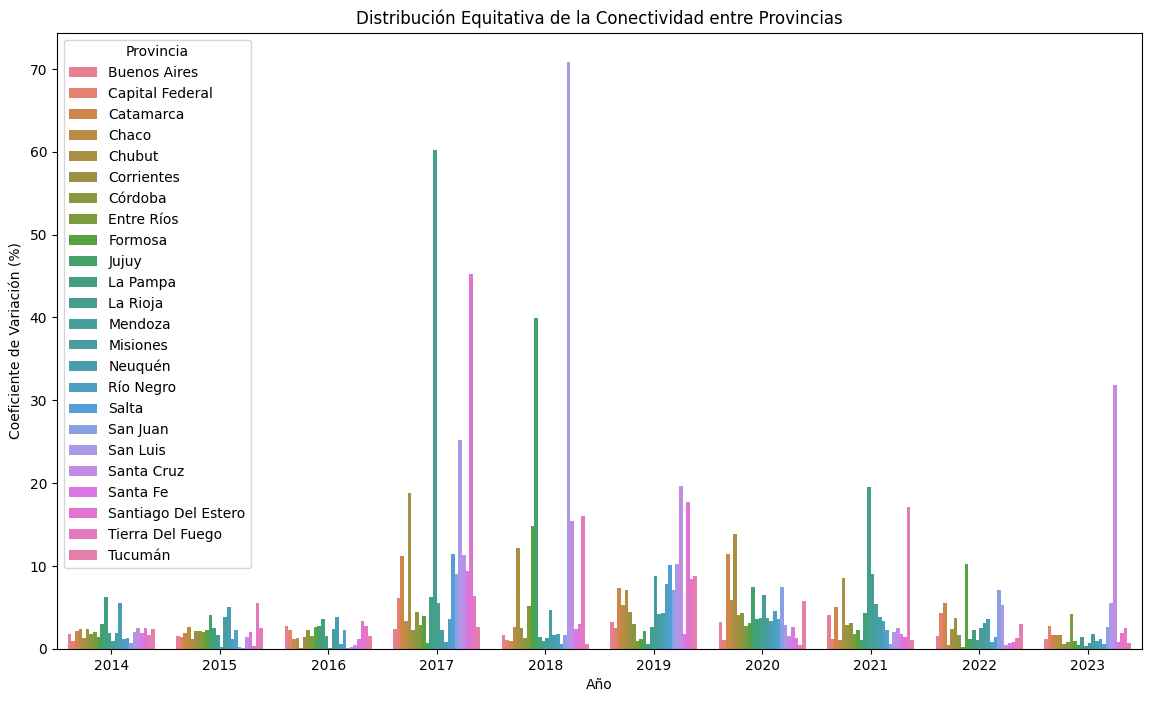

In [272]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular la media y desviación estándar por provincia y año
df_kpi_grouped = df_def.groupby(['Provincia', 'Año'])['Accesos por cada 100 hogares'].agg(['mean', 'std']).reset_index()

# Calcular el coeficiente de variación (CV)
df_kpi_grouped['CV'] = (df_kpi_grouped['std'] / df_kpi_grouped['mean']) * 100

# Visualización del coeficiente de variación por provincia y año
plt.figure(figsize=(14, 8))
sns.barplot(data=df_kpi_grouped, x='Año', y='CV', hue='Provincia')

plt.title('Distribución Equitativa de la Conectividad entre Provincias')
plt.xlabel('Año')
plt.ylabel('Coeficiente de Variación (%)')
plt.legend(title='Provincia')
plt.show()

Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total_x', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps',
       '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps',
       '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total_y',
       'Accesos por cada 100 hogares', 'Accesos por cada 100 hab',
       'Mbps (Media de bajada)', 'Región', 'Periodo'],
      dtype='object')


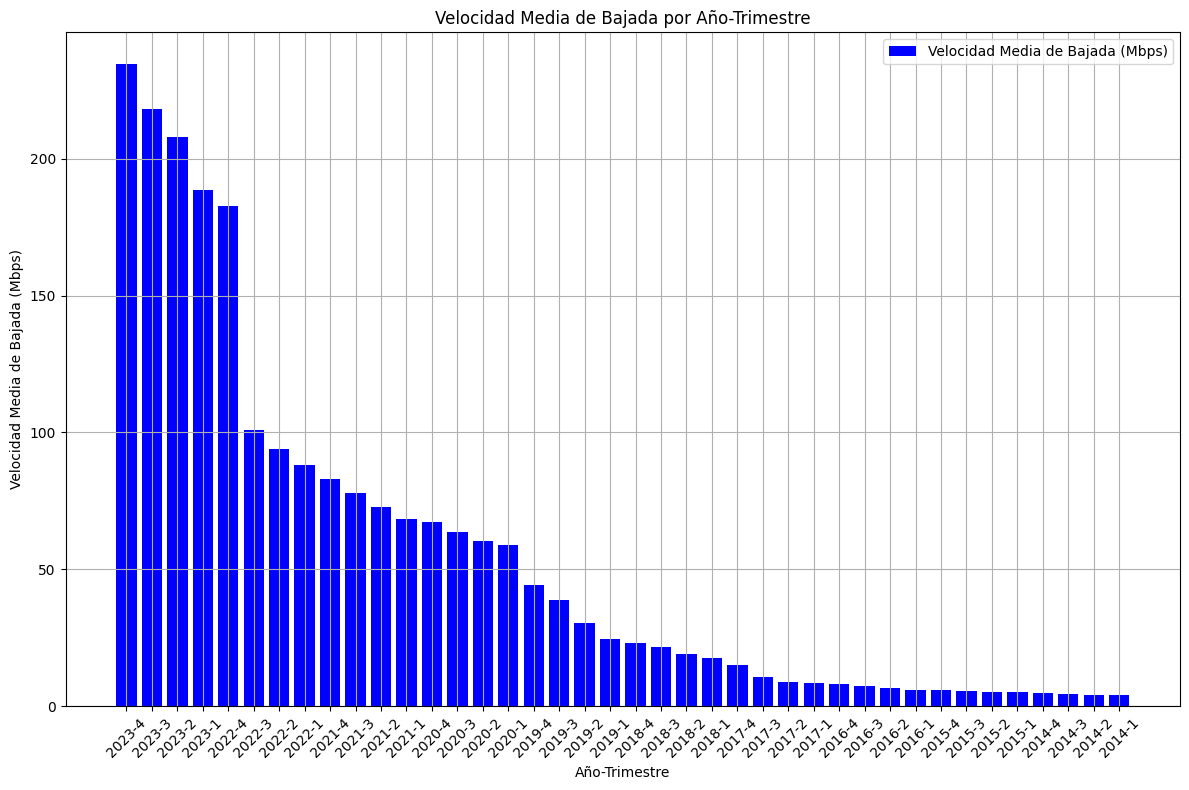

In [274]:
import matplotlib.pyplot as plt

# Asegurarte de que las columnas 'Año' y 'Trimestre' sean de tipo entero
df_def['Año'] = df_def['Año'].astype(int)
df_def['Trimestre'] = df_def['Trimestre'].astype(int)

# Crear una lista de tuplas (Año, Trimestre) para cada fila del DataFrame
years_trimesters = list(zip(df_def['Año'], df_def['Trimestre']))

# Convertir las tuplas a strings 'Año-Trimestre'
years_trimesters_str = [f'{year}-{trimester}' for year, trimester in years_trimesters]

# Verificar el nombre de la columna de velocidad media de bajada
print(df_def.columns)

# Configurar la figura y los ejes
plt.figure(figsize=(12, 8))

# Graficar los datos como un gráfico de barras
plt.bar(years_trimesters_str, df_def['Mbps (Media de bajada)'], color='b', label='Velocidad Media de Bajada (Mbps)')

plt.xlabel('Año-Trimestre')
plt.ylabel('Velocidad Media de Bajada (Mbps)')
plt.title('Velocidad Media de Bajada por Año-Trimestre')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


En el siguiente gráfico se muestra la velocidad media de bajada por trimestre y año. Se observa un claro aumento en la velocidad media a medida que se implementan y adoptan más ampliamente las tecnologías avanzadas de internet. Este aumento puede atribuirse a varios factores, entre los cuales destaca la adopción y expansión de tecnologías avanzadas como el Cable Modem y la Fibra Óptica. 

Fibra Óptica: Esta tecnología permite transmitir datos a velocidades muy superiores en comparación con las tecnologías tradicionales como el ADSL. La fibra óptica puede manejar transmisiones de datos a velocidades de gigabits por segundo, mientras que las tecnologías previas se limitaban a megabits por segundo.

Cable Modem: Utiliza la infraestructura de televisión por cable para proporcionar acceso a internet de alta velocidad, superando en capacidad a las tecnologías DSL.
Mayor Ancho de Banda:

Tanto la fibra óptica como el cable modem ofrecen un ancho de banda significativamente mayor, lo que permite a los proveedores de servicios ofrecer planes de internet con velocidades más altas. Esto se refleja en un aumento generalizado de la velocidad media de bajada.
Menor Latencia:

La fibra óptica, en particular, presenta una latencia mucho menor en comparación con las tecnologías basadas en cobre. Esto mejora la experiencia del usuario al proporcionar velocidades de descarga más rápidas y estables.
Reducción de Interferencias:

A diferencia de los cables de cobre, la fibra óptica no es susceptible a interferencias electromagnéticas, lo que resulta en una conexión más estable y con menos fluctuaciones en la velocidad.
Inversiones en Infraestructura:


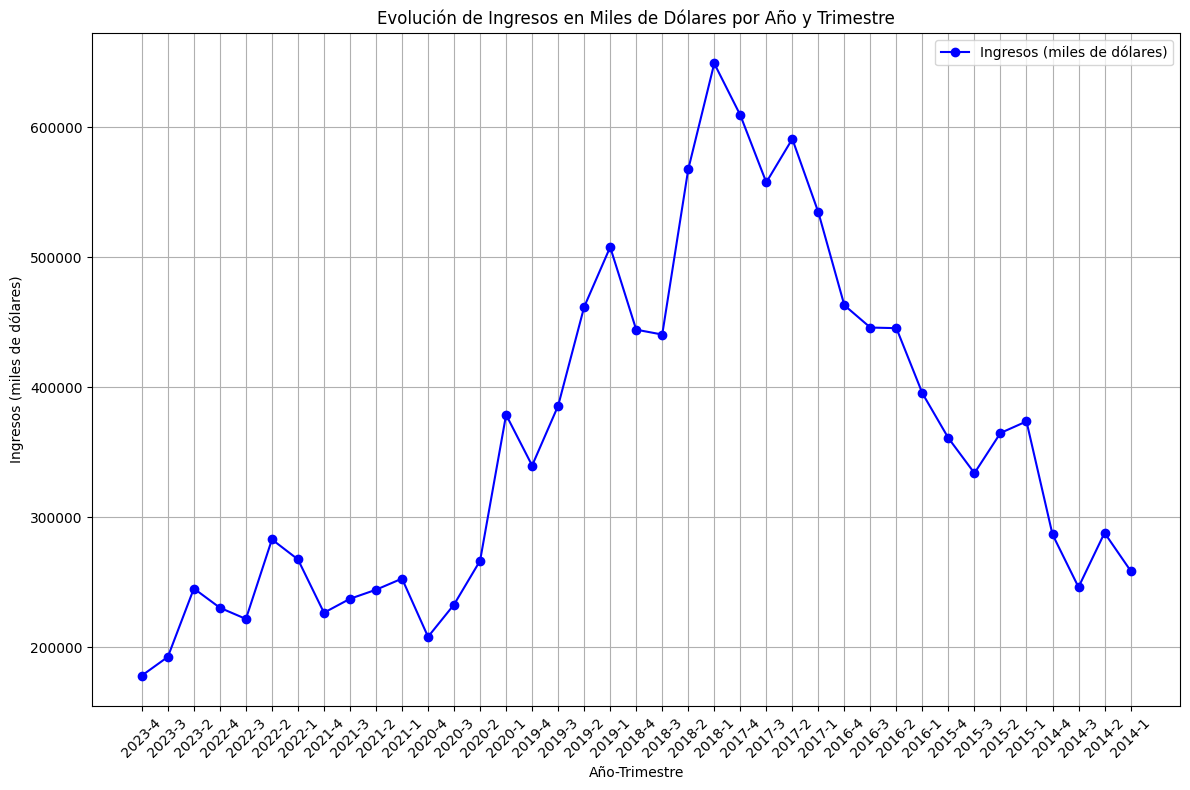

In [275]:
import matplotlib.pyplot as plt

# Convertir el índice MultiIndex a una lista de strings 'Año-Trimestre'
years_trimesters_str = [f'{year}-{trimester}' for year, trimester in zip(df_ingresos['Año'], df_ingresos['Trimestre'])]

# Configurar la figura y los ejes
plt.figure(figsize=(12, 8))

# Crear el gráfico de línea para los ingresos en miles de dólares por año y trimestre
plt.plot(years_trimesters_str, df_ingresos['Ingresos (miles de dólares)'], marker='o', color='b', label='Ingresos (miles de dólares)')
plt.xlabel('Año-Trimestre')
plt.ylabel('Ingresos (miles de dólares)')
plt.title('Evolución de Ingresos en Miles de Dólares por Año y Trimestre')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


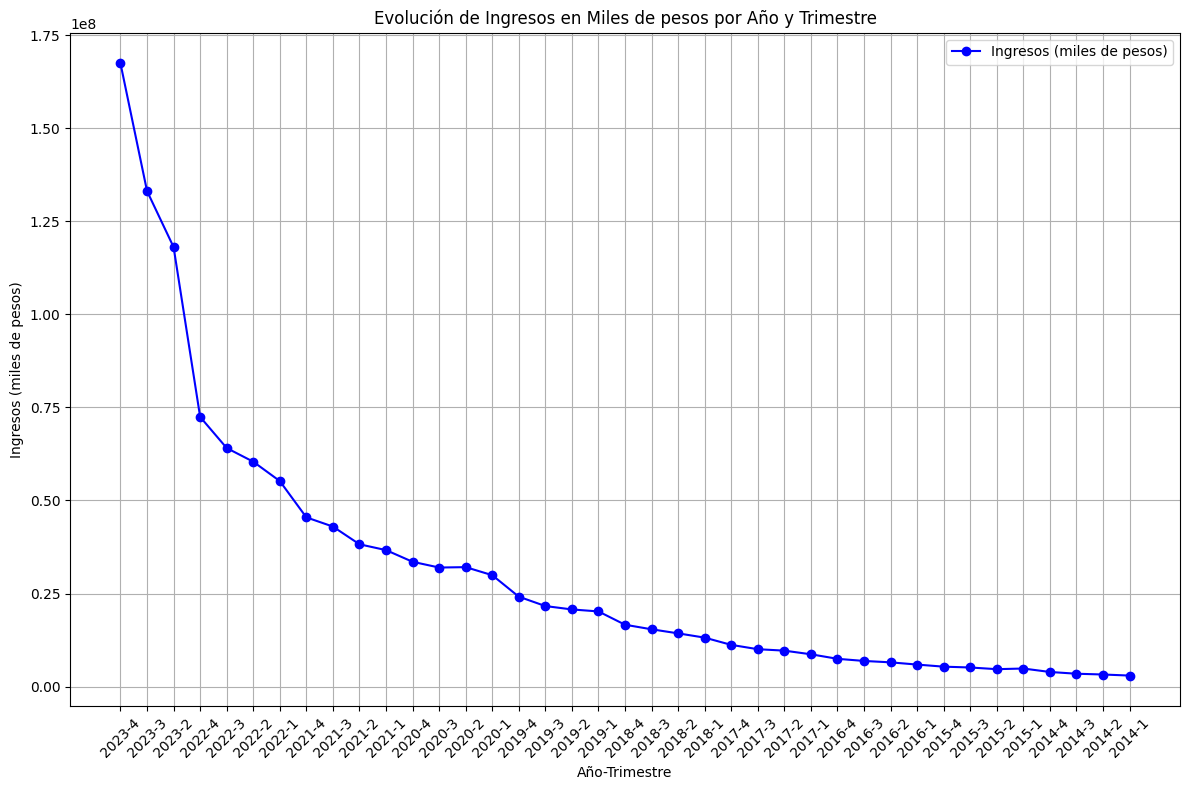

In [276]:
import matplotlib.pyplot as plt

# Convertir el índice MultiIndex a una lista de strings 'Año-Trimestre'
years_trimesters_str = [f'{year}-{trimester}' for year, trimester in zip(df_ingresos['Año'], df_ingresos['Trimestre'])]

# Configurar la figura y los ejes
plt.figure(figsize=(12, 8))

# Crear el gráfico de línea para los ingresos en miles de dólares por año y trimestre
plt.plot(years_trimesters_str, df_ingresos['Ingresos (miles de pesos)'], marker='o', color='b', label='Ingresos (miles de pesos)')
plt.xlabel('Año-Trimestre')
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Evolución de Ingresos en Miles de pesos por Año y Trimestre')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Análisis de los Gráficos de Ingresos
Ingresos en Dólares
Al observar los gráficos de ingresos en dólares, notamos una tendencia de inestabilidad. Los ingresos muestran un aumento hasta el año 2018, seguido de una caída que rebota en los últimos trimestres de 2020 aunque la suba no es muy constante y tiene altibajos.
 Esta inconstancia puede atribuirse a las devaluaciones y a la constante subida del precio del dólar, que no se mantiene estable en Argentina. La volatilidad del tipo de cambio y las políticas económicas influyen significativamente en la variación de los ingresos en dólares, afectando la previsibilidad y estabilidad de los mismos.

Ingresos en Pesos
Por otro lado, el gráfico de ingresos en pesos presenta una tendencia creciente y constante. Este aumento se debe principalmente a la alta inflación en el país. A medida que la inflación sube, el valor del peso disminuye, lo que resulta en una mayor cantidad de pesos necesarios para mantener el mismo poder adquisitivo. En este contexto, aunque no necesariamente haya un aumento en la cantidad de usuarios, la depreciación del peso argentino lleva a un incremento en los ingresos medidos en pesos.

Este análisis resalta la diferencia entre ingresos en dólares y pesos, reflejando el impacto de la inflación y la devaluación en la economía argentina. La estabilidad relativa de los ingresos en pesos contrasta con la volatilidad de los ingresos en dólares, subrayando la importancia de considerar ambos factores al evaluar la economía y el mercado.



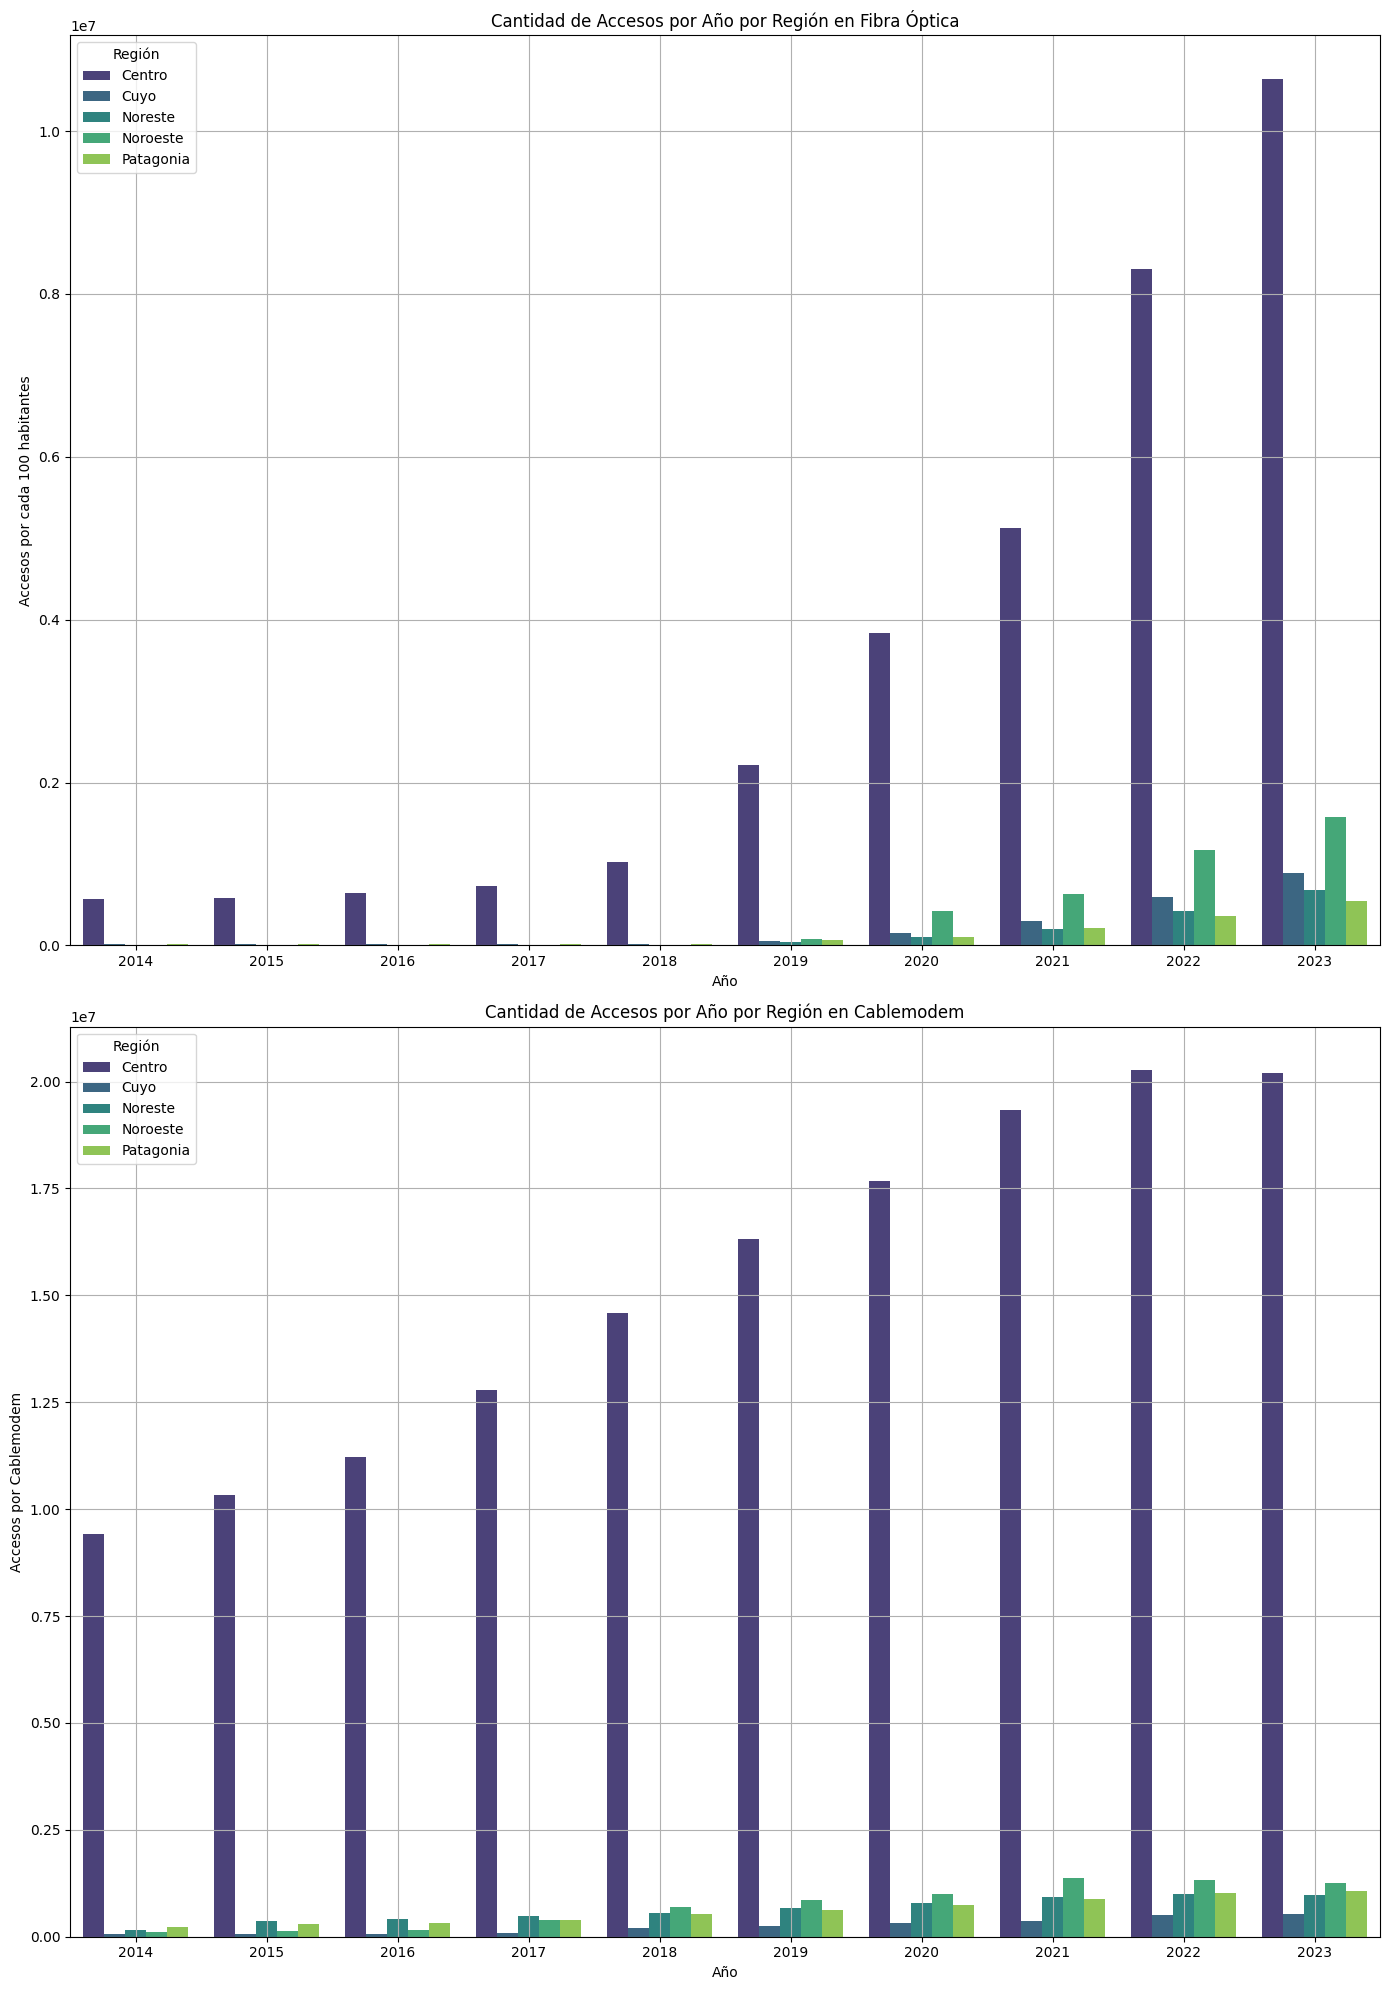

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por Año y Región y sumar los accesos por Fibra Óptica
df_accesos_fibra = df_def.groupby(['Año', 'Región'])['Fibra óptica'].sum().reset_index()

# Agrupar por Año y Región y sumar los accesos por cada 100 habitantes
df_accesos_hab = df_def.groupby(['Año', 'Región'])['Cablemodem'].sum().reset_index()

# Crear una figura con dos subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 20))

# Primer gráfico: Cantidad de accesos por año por región en fibra óptica
sns.barplot(ax=axes[0], x='Año', y='Fibra óptica', hue='Región', data=df_accesos_fibra, palette='viridis')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Accesos por cada 100 habitantes')
axes[0].set_title('Cantidad de Accesos por Año por Región en Fibra Óptica')
axes[0].legend(title='Región', loc='upper left')
axes[0].grid(True)

# Segundo gráfico: Cantidad de accesos por año por región en general
sns.barplot(ax=axes[1], x='Año', y='Cablemodem', hue='Región', data=df_accesos_hab, palette='viridis')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Accesos por Cablemodem')
axes[1].set_title('Cantidad de Accesos por Año por Región en Cablemodem')
axes[1].legend(title='Región', loc='upper left')
axes[1].grid(True)

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()




Pese a que el cable módem sigue siendo la tecnología predominante en términos de número de accesos, se observa un notable incremento en la adopción de la fibra óptica. Este incremento es particularmente significativo en regiones fuera del centro urbano de Buenos Aires, como el noreste y la Patagonia.

La implementación de programas de infraestructura, como el Plan Nacional de Conectividad "Refefo", ha contribuido al crecimiento de la fibra óptica en estas regiones. Este plan tiene como objetivo expandir y mejorar la red de internet en todo el país, lo que explica el aumento de la penetración de la fibra óptica en áreas menos urbanizadas.

En contraste, Buenos Aires muestra un crecimiento en la fibra óptica debido a su gran densidad poblacional y la demanda constante de servicios de alta velocidad, lo que mantiene a esta región en una posición predominante.

En resumen, aunque el cable módem mantiene su liderazgo en cuanto a números absolutos, la fibra óptica está ganando terreno rápidamente, impulsada por iniciativas de desarrollo regional y la necesidad creciente de conexiones más rápidas y fiables. Esta tendencia apunta hacia una mayor diversificación tecnológica y una mejora en la calidad del servicio de internet en todo el país.

# KPI 1: Mantener un crecimiento constante de la fibra óptica por encima del % por trimestre en cada región.


## KPI Adicional: Alcanzar un crecimiento del 35% en los accesos de fibra óptica en la Patagonia en el ultimo trimestre de 2023.
Fórmula:

KPI =(Fibra Optica Nuevo − Fibra Optica Actual) / Fibra Optica Actual x 100

Crecimiento_Absoluto_Fibra = (Fibra Optica Nuevo − Fibra Optica Actual)
Crecimiento_Porcentual_Fibra = Fibra Optica Nuevo − Fibra Optica Actual / Fibra Optica Actual x 100



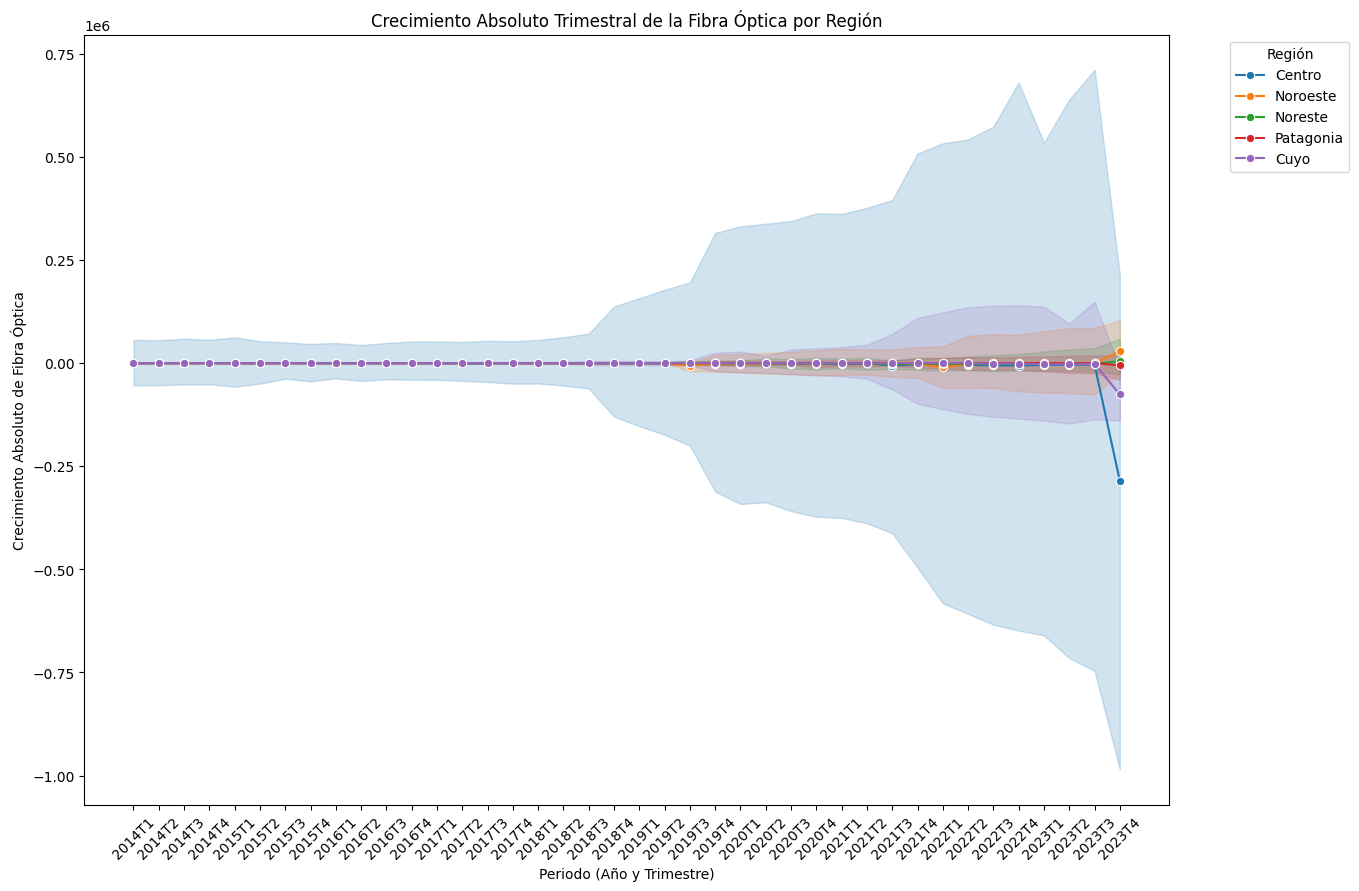

In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que 'Año' y 'Trimestre' sean de tipo string para la concatenación
df_def['Año'] = df_def['Año'].astype(str)
df_def['Trimestre'] = df_def['Trimestre'].astype(str)

# Crear una nueva columna que combine Año y Trimestre
df_def['Periodo'] = df_def['Año'] + 'T' + df_def['Trimestre']

# Ordenar los periodos para el cálculo del crecimiento
df_def['Periodo'] = pd.Categorical(df_def['Periodo'], 
                                   categories=sorted(df_def['Periodo'].unique(), 
                                                     key=lambda x: (int(x[:4]), int(x[5]))),
                                   ordered=True)

# Calcular el crecimiento absoluto y porcentual de Fibra óptica
df_def['Crecimiento_Absoluto_Fibra'] = df_def.groupby('Región')['Fibra óptica'].diff()
df_def['Crecimiento_Porcentual_Fibra'] = df_def.groupby('Región')['Fibra óptica'].pct_change() * 100

# Visualizar el crecimiento absoluto de Fibra óptica por trimestre
plt.figure(figsize=(14, 10))
sns.lineplot(data=df_def, x='Periodo', y='Crecimiento_Absoluto_Fibra', hue='Región', marker='o')
plt.title('Crecimiento Absoluto Trimestral de la Fibra Óptica por Región')
plt.xlabel('Periodo (Año y Trimestre)')
plt.ylabel('Crecimiento Absoluto de Fibra Óptica')
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


In [308]:
import pandas as pd

# Suponiendo que df_def es tu DataFrame original
# Seleccionar las columnas relacionadas con la Fibra óptica
columnas_fibra = ['Año', 'Trimestre', 'Provincia', 'Fibra óptica', 
                  'Crecimiento_Absoluto_Fibra', 'Crecimiento_Porcentual_Fibra',
                  'Penetracion_Fibra', 'nuevo_acceso_fibra',
                  'Crecimiento_Penetracion_Fibra', 'Región', 'Periodo']

# Crear el DataFrame df_fibra con las columnas seleccionadas
df_fibra = df_def[columnas_fibra].copy()

df_fibra


,Año,Trimestre,Provincia,Fibra óptica,Crecimiento_Absoluto_Fibra,Crecimiento_Porcentual_Fibra,Penetracion_Fibra,nuevo_acceso_fibra,Crecimiento_Penetracion_Fibra,Región,Periodo
936,2014,1,Buenos Aires,120960.0,117875.0,3820.907618,221659.96,120008.0,-0.787037,Centro,2014T1
912,2014,2,Buenos Aires,120008.0,115601.0,2623.122305,217952.98,124474.0,3.721419,Centro,2014T2
888,2014,3,Buenos Aires,124474.0,121269.0,3783.744150,219319.13,120528.0,-3.170140,Centro,2014T3
864,2014,4,Buenos Aires,120528.0,117683.0,4136.485062,214866.61,134177.0,11.324340,Centro,2014T4
840,2015,1,Buenos Aires,134177.0,131300.0,4563.781717,238027.05,115660.0,-13.800428,Centro,2015T1
...,...,...,...,...,...,...,...,...,...,...,...
119,2022,4,Tucumán,168717.0,153600.0,1016.074618,276404.00,180976.0,7.266014,Noroeste,2022T4
95,2023,1,Tucumán,180976.0,164320.0,986.551393,299927.08,188986.0,4.426001,Noroeste,2023T1
71,2023,2,Tucumán,188986.0,171742.0,995.952215,311088.07,195053.0,3.210291,Noroeste,2023T2
47,2023,3,Tucumán,195053.0,173308.0,797.001610,318401.89,199876.0,2.472661,Noroeste,2023T3


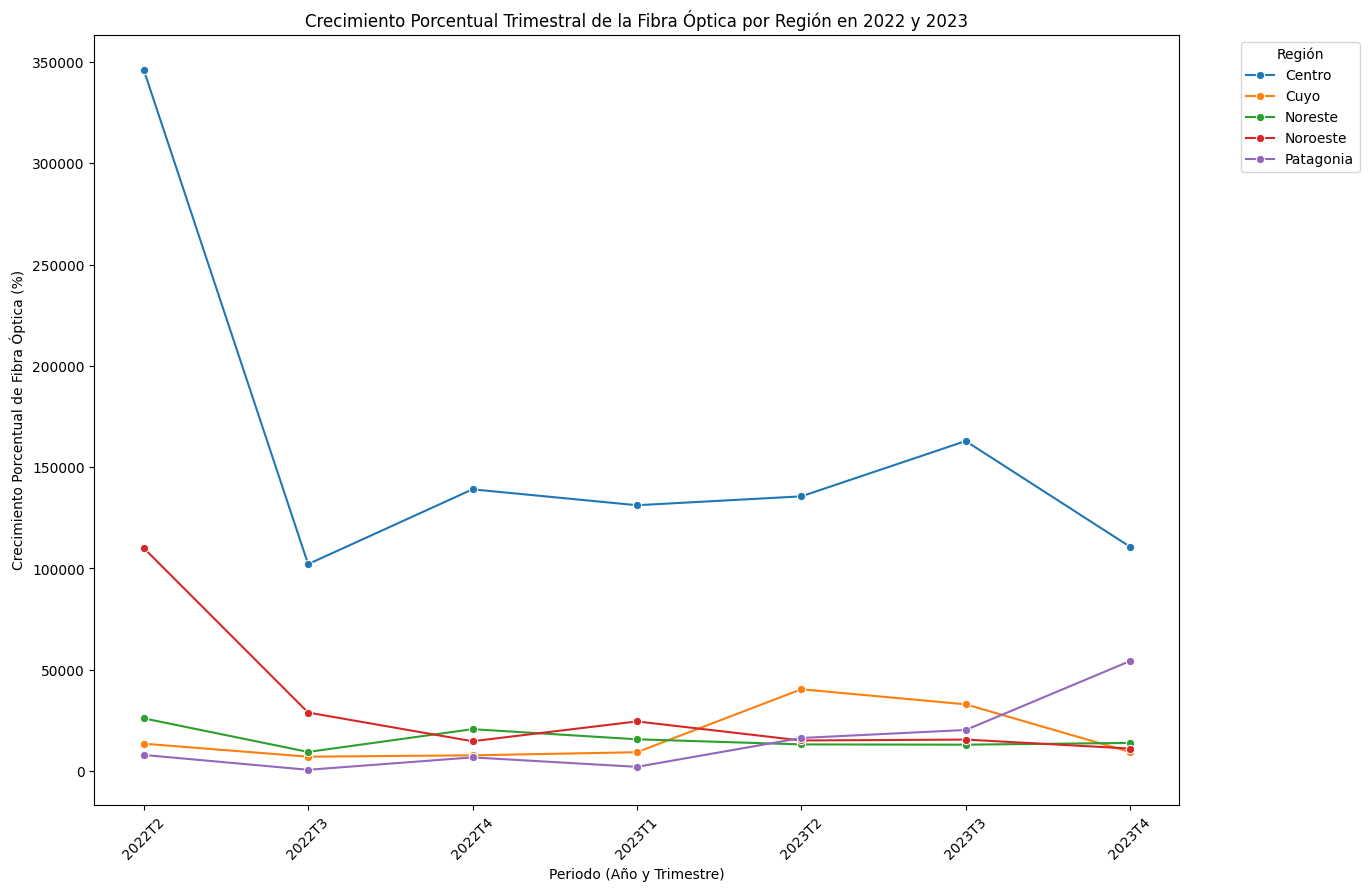

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que 'Año' y 'Trimestre' sean de tipo string para la concatenación
df_def['Año'] = df_def['Año'].astype(str)
df_def['Trimestre'] = df_def['Trimestre'].astype(str)

# Crear una nueva columna que combine Año y Trimestre
df_def['Periodo'] = df_def['Año'] + 'T' + df_def['Trimestre']

# Filtrar solo los datos del año 2022 y 2023
df_2022_2023 = df_def[(df_def['Año'] == '2022') | (df_def['Año'] == '2023')]

# Agrupar por Región y Periodo para obtener la suma de Fibra óptica
df_growth_2022_2023 = df_2022_2023.groupby(['Región', 'Periodo'])[['Fibra óptica']].sum().reset_index()

# Ordenar los periodos para el cálculo del crecimiento
df_growth_2022_2023['Periodo'] = pd.Categorical(df_growth_2022_2023['Periodo'], 
                                                categories=sorted(df_growth_2022_2023['Periodo'].unique(), 
                                                                  key=lambda x: (int(x[:4]), int(x[5]))),
                                                ordered=True)

# Calcular el crecimiento absoluto de Fibra óptica
df_growth_2022_2023['Crecimiento_Absoluto_Fibra'] = df_growth_2022_2023.groupby('Región')['Fibra óptica'].diff()

# Calcular el crecimiento porcentual de Fibra óptica
df_growth_2022_2023['Crecimiento_Porcentual_Fibra'] = df_growth_2022_2023.groupby('Región')['Fibra óptica'].pct_change() * 100

# Visualizar el crecimiento porcentual de Fibra óptica por trimestre en 2022 y 2023
plt.figure(figsize=(14, 10))
sns.lineplot(data=df_growth_2022_2023, x='Periodo', y='Crecimiento_Absoluto_Fibra', hue='Región', marker='o')
plt.title('Crecimiento Porcentual Trimestral de la Fibra Óptica por Región en 2022 y 2023')
plt.xlabel('Periodo (Año y Trimestre)')
plt.ylabel('Crecimiento Porcentual de Fibra Óptica (%)')
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


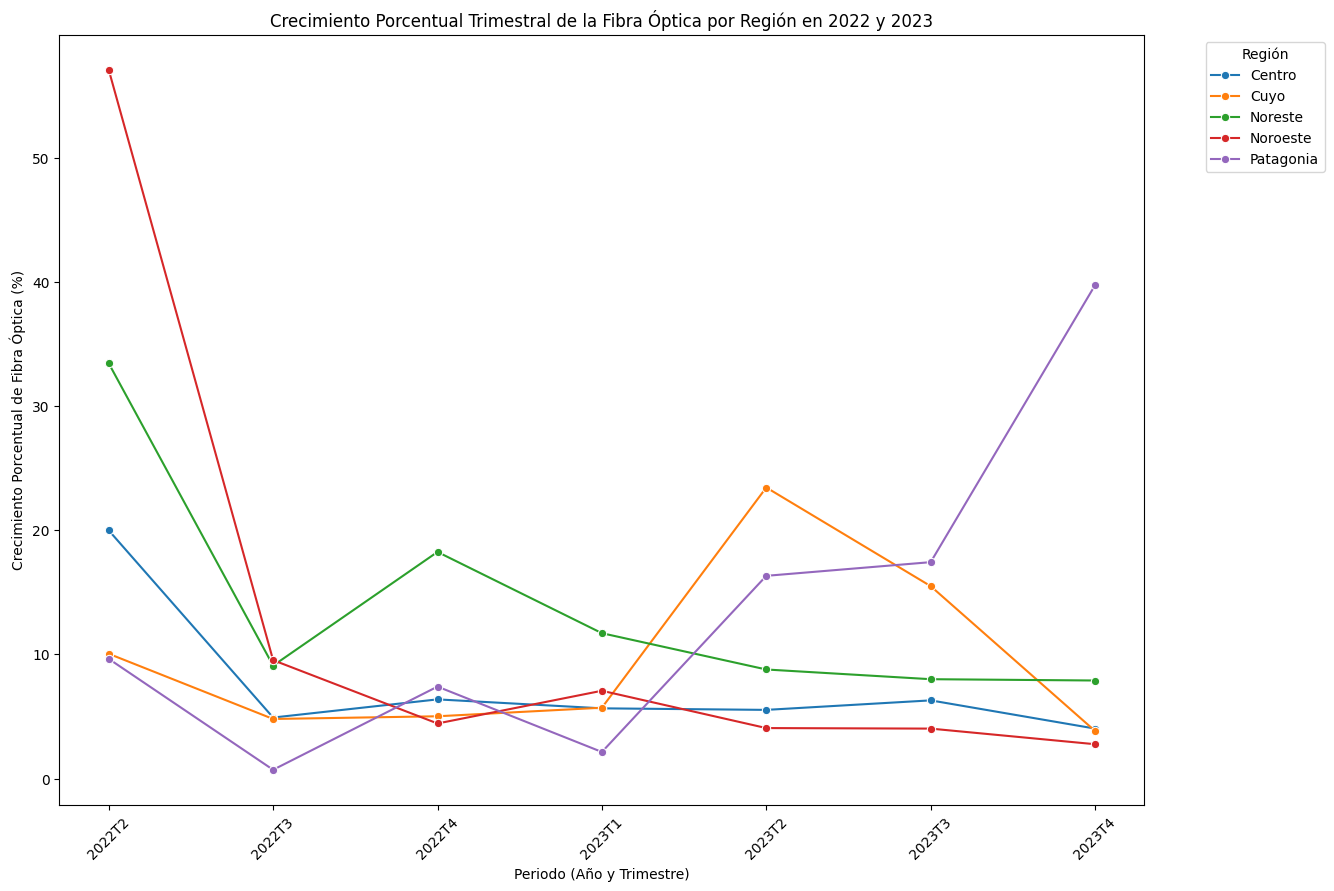

,Región,Periodo,Fibra óptica,Crecimiento_Absoluto_Fibra,Crecimiento_Porcentual_Fibra
0,Centro,2022T1,1731649.0,NaN,NaN
1,Centro,2022T2,2077780.0,346131.0,19.988520
2,Centro,2022T3,2179932.0,102152.0,4.916401
3,Centro,2022T4,2318998.0,139066.0,6.379373
4,Centro,2023T1,2450215.0,131217.0,5.658349
5,Centro,2023T2,2585809.0,135594.0,5.533963
6,Centro,2023T3,2748703.0,162894.0,6.299537
7,Centro,2023T4,2859409.0,110706.0,4.027572
8,Cuyo,2022T1,134553.0,NaN,NaN
9,Cuyo,2022T2,148080.0,13527.0,10.053288


In [280]:
plt.figure(figsize=(14, 10))
sns.lineplot(data=df_growth_2022_2023, x='Periodo', y='Crecimiento_Porcentual_Fibra', hue='Región', marker='o')
plt.title('Crecimiento Porcentual Trimestral de la Fibra Óptica por Región en 2022 y 2023')
plt.xlabel('Periodo (Año y Trimestre)')
plt.ylabel('Crecimiento Porcentual de Fibra Óptica (%)')
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()
df_growth_2022_2023

Para uno de nuestros KPIs, investigaremos el crecimiento absoluto y porcentual de la fibra óptica en las regiones del interior del país. El objetivo es evaluar cómo ha sido la distribución y el incremento de la fibra óptica fuera del área metropolitana, enfocándonos en las regiones del noreste, noroeste, Cuyo y Patagonia.

En los gráficos presentados a continuación, podemos observar el comportamiento del crecimiento de la fibra óptica en los últimos dos años (2022 y 2023). Aunque hay altibajos a lo largo de los trimestres, el crecimiento absoluto y porcentual se mantiene en niveles positivos, lo que indica un aumento constante en la cantidad de accesos.

Esta tendencia sugiere que, a pesar de las fluctuaciones trimestrales, el número de hogares con acceso a fibra óptica en las regiones del interior ha crecido de manera sostenida. Este incremento podría estar influenciado por políticas de expansión de infraestructura y programas de inversión específicos, como la implementación del Refefo (Red Federal de Fibra Óptica), que buscan reducir la brecha digital y mejorar la conectividad en todo el país.

KPI 2: Mantener un crecimiento constante de la fibra óptica por encima del 2% por trimestre en cada región del interior.

Además, establecemos un KPI adicional para la región de la Patagonia:

KPI Adicional: Alcanzar un crecimiento del 35% en los accesos de fibra óptica en la Patagonia en el ultimo trimestre de 2023.

Este objetivo adicional destaca la importancia de focalizar los esfuerzos en áreas específicas con un gran potencial de mejora, asegurando que la Patagonia, en particular, vea un incremento significativo en la conectividad de fibra óptica. Los esfuerzos combinados para mantener el crecimiento trimestral constante y alcanzar metas regionales específicas refuerzan nuestro compromiso con la mejora de la infraestructura digital en todo el país.

In [281]:
import pandas as pd

# Ordenar el DataFrame por provincia, año y trimestre 
df_def.sort_values(by=['Provincia', 'Año', 'Trimestre'], inplace=True)

# Calcular la penetración de fibra óptica
df_def['Penetracion_Fibra'] = (df_def['Fibra óptica'] / df_def['Accesos por cada 100 hogares']) * 100

# Calcular el crecimiento de la penetración de fibra óptica (crecimiento trimestral)
df_def['nuevo_acceso_fibra'] = df_def.groupby('Provincia')['Fibra óptica'].shift(-1)
df_def['Crecimiento_Penetracion_Fibra'] = ((df_def['nuevo_acceso_fibra'] - df_def['Fibra óptica']) / df_def['Fibra óptica']) * 100

# Redondear los valores de penetración y crecimiento a dos decimales
df_def['Penetracion_Fibra'] = df_def['Penetracion_Fibra'].round(2)
df_def['KPI_Crecimiento_Penetracion_Fibra'] = df_def['Crecimiento_Penetracion_Fibra'].round(2)

# Eliminar filas con NaN en nuevo_acceso_fibra si es nece
# Mostrar el resultado final
df_def


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_x,HASTA 512 kbps,...,Accesos por cada 100 hab,Mbps (Media de bajada),Región,Periodo,Crecimiento_Absoluto_Fibra,Crecimiento_Porcentual_Fibra,Penetracion_Fibra,nuevo_acceso_fibra,Crecimiento_Penetracion_Fibra,KPI_Crecimiento_Penetracion_Fibra
936,2014,1,Buenos Aires,1567685.0,1000879.0,120960.0,16528.0,33824.0,2739876.0,8469.0,...,16.692346,3.733133,Centro,2014T1,117875.0,3820.907618,221659.96,120008.0,-0.787037,-0.79
912,2014,2,Buenos Aires,1568881.0,1025490.0,120008.0,17020.0,33147.0,2764546.0,6902.0,...,16.794925,3.851863,Centro,2014T2,115601.0,2623.122305,217952.98,124474.0,3.721419,3.72
888,2014,3,Buenos Aires,1562533.0,1110628.0,124474.0,20049.0,31881.0,2849565.0,7355.0,...,17.262998,3.969047,Centro,2014T3,121269.0,3783.744150,219319.13,120528.0,-3.170140,-3.17
864,2014,4,Buenos Aires,1575978.0,1070135.0,120528.0,17728.0,32038.0,2816407.0,8226.0,...,17.014763,4.198944,Centro,2014T4,117683.0,4136.485062,214866.61,134177.0,11.324340,11.32
840,2015,1,Buenos Aires,1583135.0,1096836.0,134177.0,18754.0,28940.0,2861842.0,8882.0,...,17.241393,4.323804,Centro,2015T1,131300.0,4563.781717,238027.05,115660.0,-13.800428,-13.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2022,4,Tucumán,69441.0,20668.0,168717.0,4069.0,527.0,263422.0,39.0,...,15.120000,88.330000,Noroeste,2022T4,153600.0,1016.074618,276404.00,180976.0,7.266014,7.27
95,2023,1,Tucumán,55822.0,19482.0,180976.0,4293.0,527.0,261100.0,39.0,...,14.950000,95.790000,Noroeste,2023T1,164320.0,986.551393,299927.08,188986.0,4.426001,4.43
71,2023,2,Tucumán,50019.0,20012.0,188986.0,4060.0,525.0,263602.0,39.0,...,15.050000,96.690000,Noroeste,2023T2,171742.0,995.952215,311088.07,195053.0,3.210291,3.21
47,2023,3,Tucumán,46348.0,20545.0,195053.0,4088.0,523.0,266557.0,39.0,...,15.170000,98.850000,Noroeste,2023T3,173308.0,797.001610,318401.89,199876.0,2.472661,2.47


# KPI 2: Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia. La fórmula es la siguiente:

Donde: KPI = ((Nuevo Acceso /Acceso Actual )/Acceso Actual) * 100

"Nuevo acceso" se refiere al número de hogares con acceso a Internet después del próximo trimestre.

"Acceso actual" se refiere al número de hogares con acceso a Internet en el trimestre actual.

In [282]:
df_def['acceso_actual'] = df_def['Accesos por cada 100 hogares']
df_def['nuevo_acceso'] = df_def.groupby('Provincia')['acceso_actual'].shift(-1)
df_def['KPI'] = ((df_def['nuevo_acceso'] - df_def['acceso_actual']) / df_def['acceso_actual']) * 100
df_def['KPI'] = df_def['KPI'].round(2)
df_def


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_x,HASTA 512 kbps,...,Periodo,Crecimiento_Absoluto_Fibra,Crecimiento_Porcentual_Fibra,Penetracion_Fibra,nuevo_acceso_fibra,Crecimiento_Penetracion_Fibra,KPI_Crecimiento_Penetracion_Fibra,acceso_actual,nuevo_acceso,KPI
936,2014,1,Buenos Aires,1567685.0,1000879.0,120960.0,16528.0,33824.0,2739876.0,8469.0,...,2014T1,117875.0,3820.907618,221659.96,120008.0,-0.787037,-0.79,54.570073,55.061417,0.90
912,2014,2,Buenos Aires,1568881.0,1025490.0,120008.0,17020.0,33147.0,2764546.0,6902.0,...,2014T2,115601.0,2623.122305,217952.98,124474.0,3.721419,3.72,55.061417,56.754739,3.08
888,2014,3,Buenos Aires,1562533.0,1110628.0,124474.0,20049.0,31881.0,2849565.0,7355.0,...,2014T3,121269.0,3783.744150,219319.13,120528.0,-3.170140,-3.17,56.754739,56.094337,-1.16
864,2014,4,Buenos Aires,1575978.0,1070135.0,120528.0,17728.0,32038.0,2816407.0,8226.0,...,2014T4,117683.0,4136.485062,214866.61,134177.0,11.324340,11.32,56.094337,56.370484,0.49
840,2015,1,Buenos Aires,1583135.0,1096836.0,134177.0,18754.0,28940.0,2861842.0,8882.0,...,2015T1,131300.0,4563.781717,238027.05,115660.0,-13.800428,-13.80,56.370484,56.802806,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2022,4,Tucumán,69441.0,20668.0,168717.0,4069.0,527.0,263422.0,39.0,...,2022T4,153600.0,1016.074618,276404.00,180976.0,7.266014,7.27,61.040000,60.340000,-1.15
95,2023,1,Tucumán,55822.0,19482.0,180976.0,4293.0,527.0,261100.0,39.0,...,2023T1,164320.0,986.551393,299927.08,188986.0,4.426001,4.43,60.340000,60.750000,0.68
71,2023,2,Tucumán,50019.0,20012.0,188986.0,4060.0,525.0,263602.0,39.0,...,2023T2,171742.0,995.952215,311088.07,195053.0,3.210291,3.21,60.750000,61.260000,0.84
47,2023,3,Tucumán,46348.0,20545.0,195053.0,4088.0,523.0,266557.0,39.0,...,2023T3,173308.0,797.001610,318401.89,199876.0,2.472661,2.47,61.260000,61.040000,-0.36


In [283]:

# # Asegurar que 'Año' y 'Trimestre' sean de tipo string para la concatenación
# df_def['Año'] = df_def['Año'].astype(str)
# df_def['Trimestre'] = df_def['Trimestre'].astype(str)

# # Crear una nueva columna que combine Año y Trimestre
# df_def['Periodo'] = df_def['Año'] + 'T' + df_def['Trimestre']

# # Calcular la nueva velocidad de bajada aumentada un 5%
# df_def['Mbps (Media de bajada) Esperada'] = df_def['Mbps (Media de bajada)'] * 1.03

# # Calcular el KPI comparando con el trimestre anterior
# df_def['KPI_Aumento_Mbps'] = ((df_def['Mbps (Media de bajada)'] - df_def['Mbps (Media de bajada) Esperada'].shift(1)) / df_def['Mbps (Media de bajada) Esperada'].shift(1)) * 100

# # Configurar el gráfico de barras
# plt.figure(figsize=(12, 8))

# # Barra para Mbps (Media de bajada) actual
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # ... (resto del código sin cambios)

# # Cálculo correcto del KPI
# df_def['KPI_Aumento_Mbps'] = ((df_def['Mbps (Media de bajada)'] - df_def['Mbps (Media de bajada) Esperada'].shift(1)) / df_def['Mbps (Media de bajada) Esperada'].shift(1)) * 100

# # Gráfico de líneas para mejor visualización
# plt.figure(figsize=(12, 8))
# sns.lineplot(data=df_def, x='Periodo', y='Mbps (Media de bajada)', label='Actual')
# sns.lineplot(data=df_def, x='Periodo', y='Mbps (Media de bajada) Esperada', label='Esperado')
# plt.axhline(y=df_def['Mbps (Media de bajada)'].mean() * 1.03, color='red', linestyle='--', label='Objetivo 5%')
# plt.title('Evolución de la velocidad de bajada')
# plt.xlabel('Periodo')
# plt.ylabel('Mbps (Media de bajada)')
# plt.legend()
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.show()


# KPI 3: 5% de aumento en la velocidad media de bajada

Calculamos el porcentaje de aumento en la velocidad de bajada esperada en comparación con la velocidad actual

Explicación:

Mbps (Media de bajada) Esperada: La velocidad promedio de bajada proyectada después de aumentar un 5% respecto a la velocidad actual.
Mbps (Media de bajada): La velocidad promedio de bajada actual.

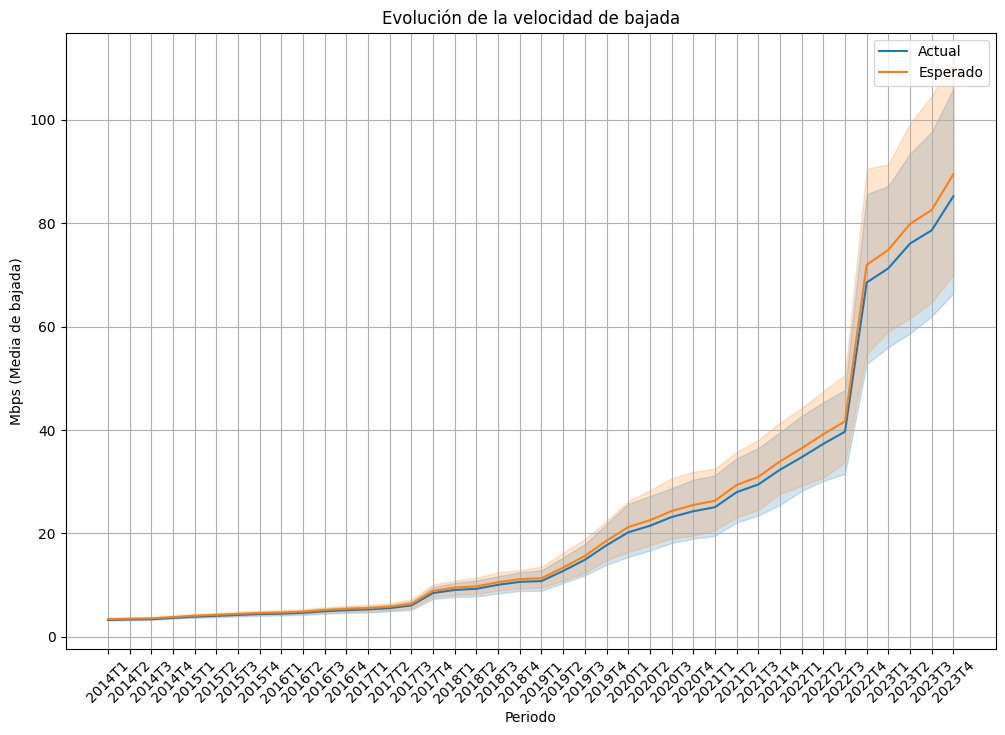

In [284]:
# Asegurar que 'Año' y 'Trimestre' sean de tipo string para la concatenación
df_def['Año'] = df_def['Año'].astype(str)
df_def['Trimestre'] = df_def['Trimestre'].astype(str)

# Crear una nueva columna que combine Año y Trimestre
df_def['Periodo'] = df_def['Año'] + 'T' + df_def['Trimestre']

# Calcular la nueva velocidad de bajada aumentada un 5%
df_def['Mbps (Media de bajada) Esperada'] = df_def.groupby('Provincia')['Mbps (Media de bajada)'].transform(lambda x: x * 1.05)

# Calcular el KPI comparando con el trimestre anterior
df_def['KPI_Aumento_Mbps'] = ((df_def['Mbps (Media de bajada)'] - df_def.groupby('Provincia')['Mbps (Media de bajada) Esperada'].shift(1)) / df_def.groupby('Provincia')['Mbps (Media de bajada) Esperada'].shift(1)) * 100

# Gráfico de líneas para mejor visualización
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_def, x='Periodo', y='Mbps (Media de bajada)', label='Actual')
sns.lineplot(data=df_def, x='Periodo', y='Mbps (Media de bajada) Esperada', label='Esperado')
plt.title('Evolución de la velocidad de bajada')
plt.xlabel('Periodo')
plt.ylabel('Mbps (Media de bajada)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Análisis:

Tendencia Actual: La velocidad de bajada actual está por debajo del objetivo del 5% de aumento deseado debido a limitaciones en la infraestructura actual, especialmente en áreas como la Patagonia y el Noreste.

Iniciativas de Mejora: Implementar redes de fibra óptica y actualizar tecnologías obsoletas como ADSL son pasos críticos para alcanzar y superar el objetivo del 5% en velocidad de bajada.

Desafíos: Los desafíos incluyen la cobertura y accesibilidad en regiones remotas y geográficamente difíciles, que requieren inversiones adicionales y planeación estratégica.

Conclusiones:

Mejorar la infraestructura de red es crucial para cumplir con el objetivo ambicioso del 5% de aumento en la velocidad de bajada.
La adopción de tecnologías de fibra óptica será fundamental para superar las limitaciones actuales y satisfacer la creciente demanda de acceso rápido a internet.
Recomendaciones para Mejorar:

Expandir la Cobertura: Priorizar la expansión de redes de fibra óptica en áreas con menor cobertura actual.
Modernización de Infraestructura: Invertir en la modernización de infraestructura para mejorar la eficiencia y calidad del servicio de internet.
Monitoreo Continuo: Establecer un sistema de monitoreo continuo para evaluar el progreso hacia el objetivo del 5% y ajustar estrategias según sea necesario.

In [285]:
# # Reordenar columnas y eliminar duplicadas
# df_def = df_def[['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
#                  'Wireless', 'Otros', 'Total_x', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps',
#                  '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps',
#                  '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total_y',
#                  'Accesos por cada 100 hogares', 'Accesos por cada 100 hab',
#                  'Mbps (Media de bajada)', 'Región', 'Periodo', 'Penetracion_Fibra',
#                  'Crecimiento_Penetracion_Fibra', 'KPI_Crecimiento_Penetracion_Fibra',
#                  'KPI', 'Mbps (Media de bajada) Esperada', 'KPI_Aumento_Mbps']]

# # Mostrar el DataFrame reordenado
# print(df_def.columns)


In [286]:
df_def

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_x,HASTA 512 kbps,...,Crecimiento_Porcentual_Fibra,Penetracion_Fibra,nuevo_acceso_fibra,Crecimiento_Penetracion_Fibra,KPI_Crecimiento_Penetracion_Fibra,acceso_actual,nuevo_acceso,KPI,Mbps (Media de bajada) Esperada,KPI_Aumento_Mbps
936,2014,1,Buenos Aires,1567685.0,1000879.0,120960.0,16528.0,33824.0,2739876.0,8469.0,...,3820.907618,221659.96,120008.0,-0.787037,-0.79,54.570073,55.061417,0.90,3.919789,NaN
912,2014,2,Buenos Aires,1568881.0,1025490.0,120008.0,17020.0,33147.0,2764546.0,6902.0,...,2623.122305,217952.98,124474.0,3.721419,3.72,55.061417,56.754739,3.08,4.044456,-1.732917
888,2014,3,Buenos Aires,1562533.0,1110628.0,124474.0,20049.0,31881.0,2849565.0,7355.0,...,3783.744150,219319.13,120528.0,-3.170140,-3.17,56.754739,56.094337,-1.16,4.167499,-1.864501
864,2014,4,Buenos Aires,1575978.0,1070135.0,120528.0,17728.0,32038.0,2816407.0,8226.0,...,4136.485062,214866.61,134177.0,11.324340,11.32,56.094337,56.370484,0.49,4.408891,0.754509
840,2015,1,Buenos Aires,1583135.0,1096836.0,134177.0,18754.0,28940.0,2861842.0,8882.0,...,4563.781717,238027.05,115660.0,-13.800428,-13.80,56.370484,56.802806,0.77,4.539994,-1.929895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2022,4,Tucumán,69441.0,20668.0,168717.0,4069.0,527.0,263422.0,39.0,...,1016.074618,276404.00,180976.0,7.266014,7.27,61.040000,60.340000,-1.15,92.746500,57.653316
95,2023,1,Tucumán,55822.0,19482.0,180976.0,4293.0,527.0,261100.0,39.0,...,986.551393,299927.08,188986.0,4.426001,4.43,60.340000,60.750000,0.68,100.579500,3.281525
71,2023,2,Tucumán,50019.0,20012.0,188986.0,4060.0,525.0,263602.0,39.0,...,995.952215,311088.07,195053.0,3.210291,3.21,60.750000,61.260000,0.84,101.524500,-3.867090
47,2023,3,Tucumán,46348.0,20545.0,195053.0,4088.0,523.0,266557.0,39.0,...,797.001610,318401.89,199876.0,2.472661,2.47,61.260000,61.040000,-0.36,103.792500,-2.634339


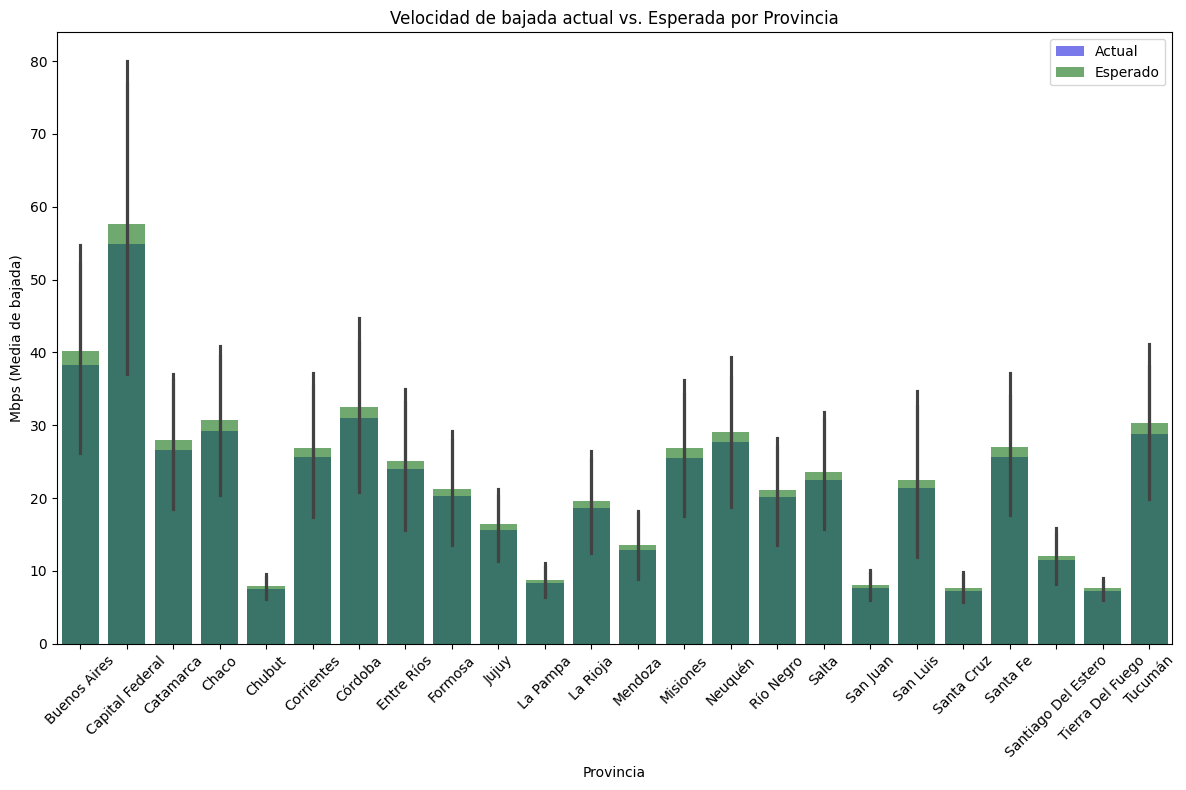

In [287]:

# Configurar el gráfico de barras
plt.figure(figsize=(12, 8))

# Barra para Mbps (Media de bajada) actual
sns.barplot(data=df_def, x='Provincia', y='Mbps (Media de bajada)', color='blue', alpha=0.6, label='Actual')

# Barra para Mbps (Media de bajada) esperado
sns.barplot(data=df_def, x='Provincia', y='Mbps (Media de bajada) Esperada', color='green', alpha=0.6, label='Esperado')

plt.title('Velocidad de bajada actual vs. Esperada por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Mbps (Media de bajada)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [288]:
import pandas as pd

# Suponiendo que tu DataFrame se llama df

# Agrupar por Provincia y Trimestre y calcular la velocidad media
df_grouped = df_def.groupby(['Provincia', 'Trimestre'])['Mbps (Media de bajada)'].mean().reset_index()

# Crear una nueva columna para el trimestre anterior
df_grouped['Trimestre_anterior'] = df_grouped['Trimestre'].shift(1)

# Calcular el crecimiento porcentual
df_grouped['Crecimiento_Mbps'] = (df_grouped['Mbps (Media de bajada)'] / df_grouped['Mbps (Media de bajada)'].shift(1) - 1) * 100

# Crear el KPI (1 si el crecimiento es >= 5%, 0 en caso contrario)
df_grouped['KPI_Crecimiento_Mbps_5%'] = (df_grouped['Crecimiento_Mbps'] >= 5).astype(int)

# Filtrar para obtener solo los registros donde el KPI es 1
df_kpi = df_grouped[df_grouped['KPI_Crecimiento_Mbps_5%'] == 1]

# Mostrar los resultados
print(df_kpi)


           Provincia Trimestre  Mbps (Media de bajada) Trimestre_anterior  \
1       Buenos Aires         2               36.035608                  1   
2       Buenos Aires         3               38.713356                  2   
3       Buenos Aires         4               45.581828                  3   
5    Capital Federal         2               50.947722                  1   
6    Capital Federal         3               54.917601                  2   
..               ...       ...                     ...                ...   
89  Tierra Del Fuego         2                7.079606                  1   
91  Tierra Del Fuego         4                8.091961                  3   
92           Tucumán         1               25.734305                  4   
93           Tucumán         2               27.078134                  1   
95           Tucumán         4               34.150069                  3   

    Crecimiento_Mbps  KPI_Crecimiento_Mbps_5%  
1           9.788548       

In [289]:
df_def['Año'] = df_def['Año'].astype(int)
df_def['Trimestre'] = df_def['Trimestre'].astype(int)
df_def.to_excel('../data/df_defffinition.xlsx', index=False)
df_growth.to_excel('../data/df_kpi.xlsx', index=False)

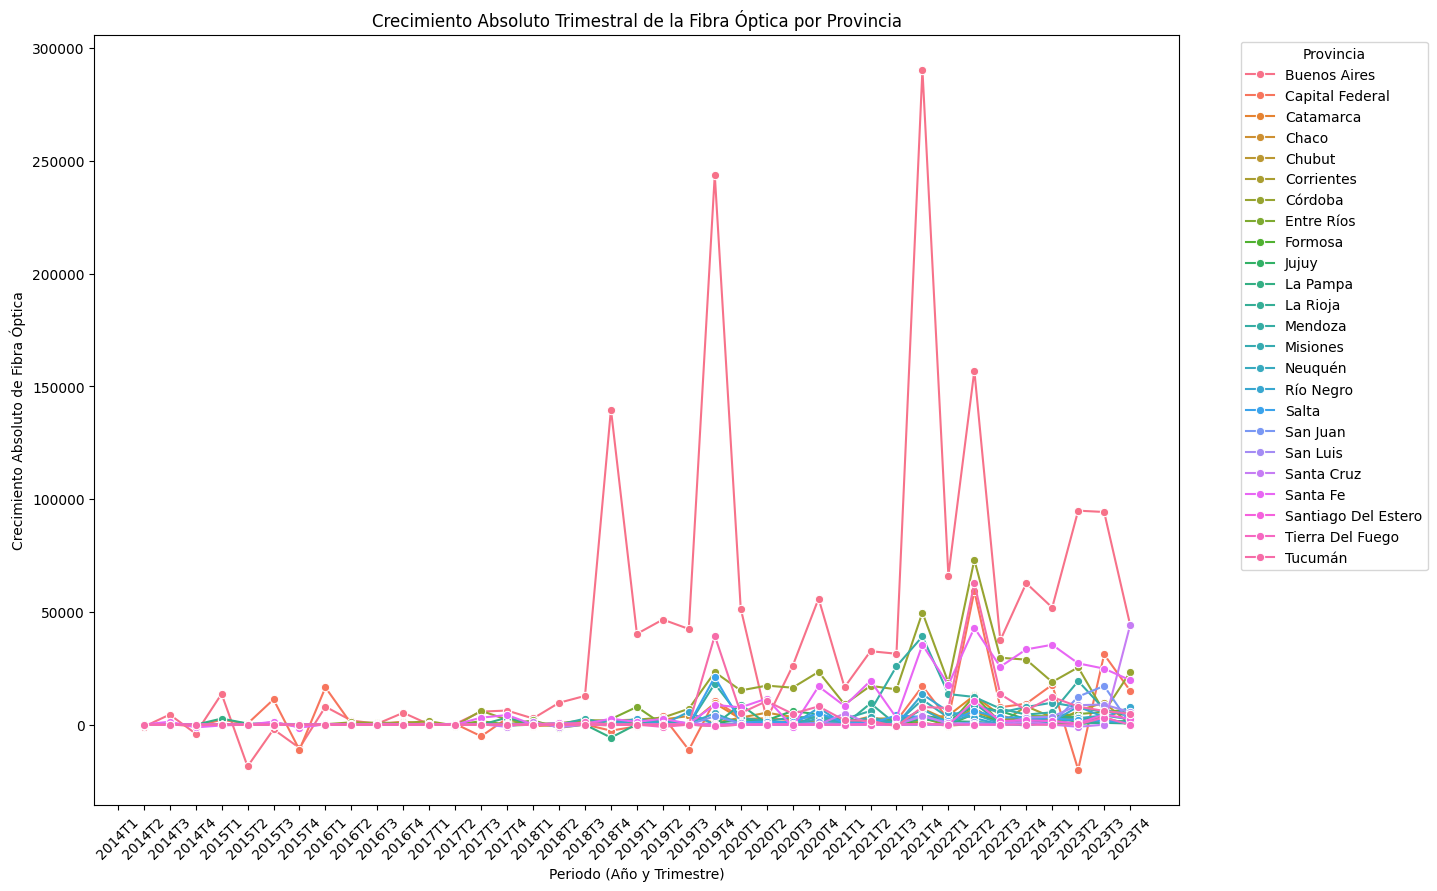

In [309]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que 'Año' y 'Trimestre' sean de tipo string para la concatenación
df_def['Año'] = df_def['Año'].astype(str)
df_def['Trimestre'] = df_def['Trimestre'].astype(str)

# Crear una nueva columna que combine Año y Trimestre
df_def['Periodo'] = df_def['Año'] + 'T' + df_def['Trimestre']

# Ordenar los periodos para el cálculo del crecimiento
df_def['Periodo'] = pd.Categorical(df_def['Periodo'], 
                                   categories=sorted(df_def['Periodo'].unique(), 
                                                     key=lambda x: (int(x[:4]), int(x[5]))),
                                   ordered=True)

# Calcular el crecimiento absoluto de Fibra óptica por provincia
df_def['Crecimiento_Absoluto_Fibra'] = df_def.groupby('Provincia')['Fibra óptica'].diff()

# Visualizar el crecimiento absoluto de Fibra óptica por trimestre y provincia
plt.figure(figsize=(14, 10))
sns.lineplot(data=df_def, x='Periodo', y='Crecimiento_Absoluto_Fibra', hue='Provincia', marker='o')
plt.title('Crecimiento Absoluto Trimestral de la Fibra Óptica por Provincia')
plt.xlabel('Periodo (Año y Trimestre)')
plt.ylabel('Crecimiento Absoluto de Fibra Óptica')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


In [313]:
df_def

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_x,HASTA 512 kbps,...,Crecimiento_Porcentual_Fibra,Penetracion_Fibra,nuevo_acceso_fibra,Crecimiento_Penetracion_Fibra,KPI_Crecimiento_Penetracion_Fibra,acceso_actual,nuevo_acceso,KPI,Mbps (Media de bajada) Esperada,KPI_Aumento_Mbps
936,2014,1,Buenos Aires,1567685.0,1000879.0,120960.0,16528.0,33824.0,2739876.0,8469.0,...,3820.907618,221659.96,120008.0,-0.787037,-0.79,54.570073,55.061417,0.90,3.919789,NaN
912,2014,2,Buenos Aires,1568881.0,1025490.0,120008.0,17020.0,33147.0,2764546.0,6902.0,...,2623.122305,217952.98,124474.0,3.721419,3.72,55.061417,56.754739,3.08,4.044456,-1.732917
888,2014,3,Buenos Aires,1562533.0,1110628.0,124474.0,20049.0,31881.0,2849565.0,7355.0,...,3783.744150,219319.13,120528.0,-3.170140,-3.17,56.754739,56.094337,-1.16,4.167499,-1.864501
864,2014,4,Buenos Aires,1575978.0,1070135.0,120528.0,17728.0,32038.0,2816407.0,8226.0,...,4136.485062,214866.61,134177.0,11.324340,11.32,56.094337,56.370484,0.49,4.408891,0.754509
840,2015,1,Buenos Aires,1583135.0,1096836.0,134177.0,18754.0,28940.0,2861842.0,8882.0,...,4563.781717,238027.05,115660.0,-13.800428,-13.80,56.370484,56.802806,0.77,4.539994,-1.929895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2022,4,Tucumán,69441.0,20668.0,168717.0,4069.0,527.0,263422.0,39.0,...,1016.074618,276404.00,180976.0,7.266014,7.27,61.040000,60.340000,-1.15,92.746500,57.653316
95,2023,1,Tucumán,55822.0,19482.0,180976.0,4293.0,527.0,261100.0,39.0,...,986.551393,299927.08,188986.0,4.426001,4.43,60.340000,60.750000,0.68,100.579500,3.281525
71,2023,2,Tucumán,50019.0,20012.0,188986.0,4060.0,525.0,263602.0,39.0,...,995.952215,311088.07,195053.0,3.210291,3.21,60.750000,61.260000,0.84,101.524500,-3.867090
47,2023,3,Tucumán,46348.0,20545.0,195053.0,4088.0,523.0,266557.0,39.0,...,797.001610,318401.89,199876.0,2.472661,2.47,61.260000,61.040000,-0.36,103.792500,-2.634339


In [314]:
df_def.to_excel('../data/df_defffinition.xlsx', index=False)
